In [1]:
import pandas as pd
import ast
from ast import literal_eval
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics
import networkx as nx
from collections import Counter, defaultdict
import matplotlib.cm as cm
from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community import modularity
import pandas as pd
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

from itertools import combinations

# Importing Data 

In [2]:
entities_df = pd.read_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/entities-all-MD_GBIF_v3.csv', encoding='utf-8')
entities_df

,fileMain_s,TaxoEntitiesMD2_GBIF
0,https://hal.inrae.fr/hal-03461601/document,"[[('GBIF:3183002', 'clove', 0.7634411454200745..."
1,https://hal.science/hal-03829927/document,"[[('GBIF:9065640', 'Tyto novaehollandiae novae..."
2,https://hal.science/hal-02350603/document,[]
3,https://shs.hal.science/halshs-02937670/document,"[[('GBIF:5786457', 'Sateré Marmoset', 0.771187..."
4,https://cnam.hal.science/hal-04080723/document,"[[('GBIF:4494312', 'Spilomena beata Blüthgen',..."
...,...,...
1151,https://hal.sorbonne-universite.fr/hal-0295053...,"[[('GBIF:2368377', 'Oryzias latipes', 1.0)], [..."
1152,https://u-picardie.hal.science/hal-03619105/do...,"[[('GBIF:4667268', 'Agustina', 0.7207658290863..."
1153,https://hal.inrae.fr/hal-02636091/document,"[[('GBIF:2438660', 'European Pine Vole', 0.730..."
1154,https://hal.science/hal-04167917/document,"[[('GBIF:2432958', 'Hypsignathus monstrosus', ..."


In [3]:
topics_df = pd.read_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/papers_BERTopic_LDA.csv', sep='\t', encoding='utf-8')
topics_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,content_text,cleaned_content_text,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,httpshalinraefrhal dec multidisciplinary open ...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}"
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,HAL Id: hal-03829927 https://hal.science/hal-0...,httpshalsciencehal mar multidisciplinary open ...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}"
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,People and Nature. 2019;1:31–43. | 31 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2..."
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,HAL Id: halshs-02937670 https://shs.hal.scienc...,halshs httpsshshalsciencehalshs multidisciplin...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1..."
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,People and Nature. 2023;5:69–83. | 69 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"['female', 'male', 'male', 'male', 'female', '...",0.000000,HAL Id: hal-02950535 https://hal.sorbonne-univ...,httpshalsorbonneuniversitefrhal sep multidisci...,55877,['httpshalsorbonneuniversitefrhal sep multidis...,14,"[0, 32, 32, 32, -1, -1, -1, -1, -1, -1, -1, 32...","{1: 1.07, 13: 5.18, 19: 1.3, 27: 3.55, 30: 5.2..."
1152,"['Think globally, measure locally: The MIREN s...",Ecology and Evolution,"['Haider', 'Lembrechts', 'Mcdougall', 'Pauchar...","['Sylvia Haider', 'Jonas J. Lembrechts', 'Keit...",['Climate change and other global change dri

In [4]:
dates_df = pd.read_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/papers_dates.csv')
dates_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,submittedDate_s,releasedDateY_i,abstract_s,fileMain_s
0,['Lifetime nutrient dynamics reveal simultaneo...,Ecology,"['Casas', 'Pincebourde', 'Mandonμf. Vannier', ...","['J. Casas', 'Sylvain Pincebourde', 'N. Mandon...",2005-11-24 11:13:25,2005.0,NaN,NaN
1,['Quantifying the impact of environmental fact...,Journal of Applied Ecology,"['Schweiger', 'Maelfait', 'van Wingerden', 'He...","['Oliver Schweiger', 'J.P. Maelfait', 'Walter ...",2005-12-01 13:28:48,2005.0,NaN,NaN
2,['Nutritional ecology of insect plant-interact...,Oikos,"['van Loon', 'Pincebourde', 'Casas']","['J. van Loon', 'Sylvain Pincebourde', 'J. Cas...",2005-11-24 11:06:57,2005.0,NaN,NaN
3,['Tre allometry and improved estimation of car...,Oecologia,"['Chave', 'Andalo', 'Brown', 'Cairns', 'Q. Cha...","['Jérôme Chave', 'Christophe Andalo', 'S. Brow...",2006-11-10 16:31:56,2006.0,NaN,NaN
4,['Tracing individual movements of aphids revea...,Ecological Applications,"['Vialatte', 'Simon', 'Dedryver', 'Fabre', 'Pl...","['Aude Vialatte', 'Jean-Christophe Simon', 'Ch...",2006-07-18 13:53:54,2006.0,['Agricultural pests are not restricted to cro...,NaN
...,...,...,...,...,...,...,...,...
2928,['Maritime international trade and bioinvasion...,Journal of Applied Ecology,"['Badou', 'Missihoun', 'Agbangla', 'Gauthier',...","['Sylvestre Badou', 'Antoine A. Missihoun', 'C...",2024-01-02 10:46:41,2024.0,['1. International trade has been favouring th...,https://hal.inrae.fr/hal-04369169/document
2929,['Perspectives in modelling ecological interac...,Journal of Applied Ecology,"['Quévreux', 'Brose', 'Galiana', 'Potapov', 'T...","['Pierre Quévreux', 'Ulrich Brose', 'Núria Gal...",2024-01-27 11:37:50,2024.0,['The concept of ecological interaction networ...,https://hal.science/hal-04421063/document
2930,['Bank vole alarm pheromone chemistry and effe...,Oecologia,"['Sievert', 'Ylönen', 'Blande', 'Saunier', 'va...","['Thorbjörn Sievert', 'Hannu Ylönen', 'James B...",2024-02-06 10:15:07,2024.0,['Abstract Chemical communication plays an imp...,NaN
2931,['What it takes to invade grassland ecosystems...,Ecology Letters,"['Carboni', 'Münkemüller', 'Lavergne', 'Choler...","['Marta Carboni', 'Tamara Münkemüller', 'Sebas...",2024-01-18 08:54:06,2024.0,"[""Whether the success of alien species can be ...",https://hal.umontpellier.fr/hal-01811228/document


In [5]:
merged_df = pd.merge(topics_df, entities_df, on='fileMain_s', how='inner')
merged_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,content_text,cleaned_content_text,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,httpshalinraefrhal dec multidisciplinary open ...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745..."
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,HAL Id: hal-03829927 https://hal.science/hal-0...,httpshalsciencehal mar multidisciplinary open ...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae..."
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,People and Nature. 2019;1:31–43. | 31 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[]
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,HAL Id: halshs-02937670 https://shs.hal.scienc...,halshs httpsshshalsciencehalshs multidisciplin...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187..."
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,People and Nature. 2023;5:69–83. | 69 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"['female', 'male', 'male', 'male', 'female', '...",0.000000,HAL Id: hal-02950535 https://hal.sorbonne-univ...,httpshalsorbonneuniversitefrhal sep multidisci...,55877,['httpshalsorbonneuniversitefrhal sep multidis...,14,"[0, 32, 32, 32, -1, -1, -1, -1, -1, -1, -1, 32...","{1: 1.07, 13: 5.18, 19: 1.3, 27: 3.55, 30:

In [6]:
merged_df = pd.merge(merged_df, dates_df[['fileMain_s', 'releasedDateY_i']], on='fileMain_s', how='inner')
# Remove rows with NaN values in the 'releasedDateY_i' column
merged_df = merged_df.dropna(subset=['releasedDateY_i'])

# Optionally, convert the 'releasedDateY_i' to integer if it's not already
merged_df['releasedDateY_i'] = merged_df['releasedDateY_i'].astype(int)
merged_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,content_text,cleaned_content_text,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,httpshalinraefrhal dec multidisciplinary open ...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,HAL Id: hal-03829927 https://hal.science/hal-0...,httpshalsciencehal mar multidisciplinary open ...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,People and Nature. 2019;1:31–43. | 31 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,HAL Id: halshs-02937670 https://shs.hal.scienc...,halshs httpsshshalsciencehalshs multidisciplin...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,People and Nature. 2023;5:69–83. | 69 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"['female', 'male', 'male', 'male', 'female', '...",0.000000,HAL Id: hal-02950535 https://hal.sorbonne-univ...,httpshalsorbonneuniversitefrhal sep multidisci...,55877,['httpshalsorbonneuniversitefrhal sep multidis...,14,"[0, 32, 32, 32, -1, -1, -1, -1, -1, -1, -1, 32...

In [7]:
''' Not workiig, returning NONE in every field
def complement_hal(df, hal_existing_field, column, hal_field_target):
    import requests
    """
    Complements a DataFrame with additional data retrieved from the HAL API.

    Parameters:
    - df: DataFrame to be complemented.
    - hal_existing_field: Field in the HAL API corresponding to a column in the DataFrame.
    - column: Column name in the DataFrame that corresponds to the HAL existing field.
    - hal_field_target: Field name in the HAL API from which to extract data.

    Returns:
    - DataFrame with a new column containing the data from hal_field_target.
    """
    # Initialize an empty list to store the new data
    new_data = []
    
    # Base URL for the HAL API
    base_url = "https://api.archives-ouvertes.fr/search/?"
    
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Prepare the query
        query = f"{base_url}q={hal_existing_field}:{row[column]}&fl={hal_field_target}&rows=1"
        #print(query)
        
        # Try to fetch the data from HAL API
        try:
            response = requests.get(query, timeout=30)  # 30-second timeout
            data = response.json()  # Parse the JSON response
            
            # Extract the target field if available
            if data.get('response') and data['response'].get('docs') and len(data['response']['docs']) > 0:
                new_data.append(data['response']['docs'][0].get(hal_field_target, None))
            else:
                new_data.append(None)
        except requests.exceptions.RequestException as e:
            print(f"Request failed: {e}")
            new_data.append(None)
    
    # Add the new data to the DataFrame as a new column
    df[hal_field_target] = new_data
    
    return df

# Example usage
merged_df = complement_hal(merged_df, 'title_s', 'title_s', 'submittedDate_s')
merged_df
'''

' Not workiig, returning NONE in every field\ndef complement_hal(df, hal_existing_field, column, hal_field_target):\n    import requests\n    """\n    Complements a DataFrame with additional data retrieved from the HAL API.\n\n    Parameters:\n    - df: DataFrame to be complemented.\n    - hal_existing_field: Field in the HAL API corresponding to a column in the DataFrame.\n    - column: Column name in the DataFrame that corresponds to the HAL existing field.\n    - hal_field_target: Field name in the HAL API from which to extract data.\n\n    Returns:\n    - DataFrame with a new column containing the data from hal_field_target.\n    """\n    # Initialize an empty list to store the new data\n    new_data = []\n    \n    # Base URL for the HAL API\n    base_url = "https://api.archives-ouvertes.fr/search/?"\n    \n    # Iterate over each row in the DataFrame\n    for index, row in df.iterrows():\n        # Prepare the query\n        query = f"{base_url}q={hal_existing_field}:{row[column]

In [8]:


def parse_LDAtopics(row):
    try:
        # Convert string representation of dictionary to actual dictionary
        topics_dict = ast.literal_eval(row)
        if isinstance(topics_dict, dict):
            # Prepend 'L' to each topic number in the keys
            return {f"L{key}": value for key, value in topics_dict.items()}
    except ValueError as e:
        print(f"Error parsing row: {e}")  # Print the error message if there's an issue
        return {}
    return {}

# Example DataFrame column parsing
merged_df['Parsed_TopicsLDA'] = merged_df['TopicsLDA'].apply(parse_LDAtopics)

merged_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,content_text,cleaned_content_text,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i,Parsed_TopicsLDA
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,httpshalinraefrhal dec multidisciplinary open ...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}"
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,HAL Id: hal-03829927 https://hal.science/hal-0...,httpshalsciencehal mar multidisciplinary open ...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1..."
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,People and Nature. 2019;1:31–43. | 31 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':..."
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,HAL Id: halshs-02937670 https://shs.hal.scienc...,halshs httpsshshalsciencehalshs multidisciplin...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':..."
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,People and Nature. 2023;5:69–83. | 69 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,Tr

In [9]:
import pandas as pd
from collections import Counter
import ast

# Define a function to parse the string representation of the list and return a Counter dictionary
def parse_and_count_topics(topic_string):
    # Check if the topic_string is NaN
    if pd.isna(topic_string):
        return np.nan
    # Convert the string representation of a list to an actual list using ast.literal_eval
    topic_list = ast.literal_eval(topic_string)
    # Create a Counter dictionary from the list to count the occurrence of each topic
    topic_counter = Counter(f"B{topic}" for topic in topic_list)
    return dict(topic_counter)


# Apply the function to each row in the 'Chunks_BERTopics' column to create the new 'Parsed_BERTopics' column
merged_df['Parsed_BERTopics'] = merged_df['Chunks_BERTopics'].apply(parse_and_count_topics)

# Now the 'Parsed_BERTopics' column contains a dictionary with the count of each topic for that row
merged_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,cleaned_content_text,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,...,httpshalinraefrhal dec multidisciplinary open ...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{'B0': 1, 'B124': 7, 'B-1': 4}"
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,...,httpshalsciencehal mar multidisciplinary open ...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}"
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,...,people nature wileyonlinelibrarycomjournalpan ...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}"
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,...,halshs httpsshshalsciencehalshs multidisciplin...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{'B0': 1, 'B4': 11, 'B-1': 4}"
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,...,people nature wileyonlinelibrarycomjournalpan ...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{'B-1': 11, 'B45': 2, 'B53': 1}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"['female', 'male', 'male', 'male', 'fe

# Gender - Extracting more information

In [3]:
papers_df = pd.read_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/papers_v3_basics.csv', encoding='utf-8')
papers_df

,fileMain_s,numChunks,Chunks_BERTopics,Topic_Counter,Topic_Percentage,TaxoEntitiesMD2_GBIF,TaxoEntities_Count,Species_Count,kingdom_tuple_Count,phylum_tuple_Count,...,order_tuple_Count,family_tuple_Count,genus_tuple_Count,species_tuple_Count,Parsed_TopicsLDA,releasedDateY_i,Gender_Numeric_Avg,First_Gender_Value,Last_Gender_Value,Gender_Counts
0,https://cnrs.hal.science/hal-03755748/document,1,[61],{'B61': 1},{'B61': 100.0},[],Counter(),[],[],[],...,[],[],[],[],"{'L4': 25, 'L10': 19, 'L12': 8, 'L21': 22, 'L3...",2022,-0.555556,1.0,-1.0,"{'female': 2, 'male': 2, 'unknown': 2}"
1,https://hal.science/hal-01296551/document,1,[-1],{'B-1': 1},{'B-1': 100.0},[],Counter(),[],[],[],...,[],[],[],[],"{'L29': 4, 'L30': 5, 'L32': 7, 'L47': 67, 'L57...",2016,-0.333333,1.0,-1.0,"{'male': 6, 'female': 4, 'unknown': 1, 'mostly..."
2,https://hal.science/hal-00870744/document,1,[-1],{'B-1': 1},{'B-1': 100.0},[],Counter(),[],[],[],...,[],[],[],[],"{'L19': 6, 'L30': 7, 'L47': 85}",2013,-1.000000,-1.0,-1.0,"{'female': 1, 'male': 1}"
3,https://hal.science/hal-00949680/document,1,[5],{'B5': 1},{'B5': 100.0},[],Counter(),[],[],[],...,[],[],[],[],"{'L21': 5, 'L38': 16, 'L46': 13, 'L50': 64}",2014,0.000000,-1.0,0.0,{'female': 2}
4,https://hal.inrae.fr/hal-02699278/document,1,[-1],{'B-1': 1},{'B-1': 100.0},"[[('GBIF:3042', 'aphid', 1.0), ('GBIF:4386623'...","Counter({('GBIF:3042', 'aphid'): 2, ('GBIF:438...","[Counter({('GBIF:2069580', 'Rhopalosiphum padi...","[(('GBIF:1', 'Animalia'), 4)]","[(('GBIF:54', 'Arthropoda'), 4)]",...,"[(('GBIF:809', 'Hemiptera'), 4)]","[(('GBIF:3042', 'Aphididae'), 4)]","[(('GBIF:2069512', 'Rhopalosiphum'), 4)]","[(('GBIF:2069580', 'Rhopalosiphum padi'), 4)]","{'L9': 11, 'L19': 8, 'L38': 6, 'L39': 32, 'L56...",2020,-0.833333,-0.5,-1.0,"{'male': 7, 'female': 7}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,https://hal.science/hal-03362851/document,47,"[60, 2, 2, 2, 2, -1, 2, 2, -1, 1, 1, -1, -1, -...","{'B60': 1, 'B2': 26, 'B-1': 10, 'B1': 4, 'B22'...","{'B60': 2.127659574468085, 'B2': 55.3191489361...","[[('GBIF:1673043', 'Synthesia', 0.906332910060...","Counter({('GBIF:2878688', 'Quercus robur'): 2,...","[Counter({('GBIF:2878688', 'Quercus robur'): 2...","[(('GBIF:6', 'Plantae'), 331)]","[(('GBIF:7707728', 'Tracheophyta'), 331)]",...,"[(('GBIF:1354', 'Fagales'), 82), (('GBIF:691',...","[(('GBIF:5015', 'Rosaceae'), 61), (('GBIF:4689...","[(('GBIF:2877951', 'Quercus'), 27), (('GBIF:28...","[(('GBIF:2882316', 'Fagus sylvatica'), 18), ((...","{'L8': 4, 'L17': 8, 'L21': 72, 'L38': 2, 'L48'...",2021,-0.442308,1.0,-1.0,"{'female': 4, 'mostly_female': 1, 'male': 2, '..."
1004,https://hal.science/hal-03004624/document,54,"[5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...","{'B5': 1, 'B-1': 45, 'B4': 5, 'B1': 1, 'B40': ...","{'B5': 1.8518518518518516, 'B-1': 83.333333333...","[[('GBIF:2440735', 'Balaenoptera musculus', 1....","Counter({('GBIF:5888', 'white sharks'): 2, ('G...","[Counter({('GBIF:2440735', 'Balaenoptera muscu...","[(('GBIF:1', 'Animalia'), 70), (('GBIF:6', 'Pl...","[(('GBIF:44', 'Chordata'), 69), (('GBIF:54', '...",...,"[(('GBIF:732', 'Carnivora'), 18), (('GBIF:731'...","[(('GBIF:9701', 'Canidae'), 18), (('GBIF:5240'...","[(('GBIF:5219142', 'Canis'), 18), (('GBIF:2481...","[(('GBIF:5219173', 'Canis lupus'), 18), (('GBI...","{'L12': 4, 'L14': 8, 'L16': 1, 'L18': 2, 'L29'...",2020,-0.642857,-1.0,-0.5,"{'female': 3, 'male': 5}"
1005,https://hal.inrae.fr/hal-04429206/document,57,"[60, 2, 60, 2, 2, 2, 2, 2, 2, -1, -1, 1, -1, 2...","{'B60': 2, 'B2': 17, 'B-1': 36, 'B1': 1, 'B14'...","{'B60': 3.508771929824561, 'B2': 29.8245614035...","[[('GBIF:4597213', 'Wolfgangia', 0.70422244071...","Counter({('GBIF:2382506', 'Gorete'): 3, ('GBIF...","[Counter({('GBIF:2482552', 'Chough'): 1}), Cou...","[(('GBIF:1', 'Animalia'), 9), (('GBIF:6', 'Pla...","[(('GBIF:44', 'Chordata'), 9), (('GBIF:7707728...",...,"[(('GBIF:587', 'Perciformes'), 3), (('GBIF:729...","[(('GBIF:4276', 'Haemulidae'), 3), 

In [4]:


# Convert string representation of lists back to actual lists
merged_df['Genders'] = merged_df['Genders'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now, define the counting function
def count_genders(gender_list):
    return dict(Counter(gender_list))

# Apply the counting function
merged_df['Gender_Counts'] = merged_df['Genders'].apply(count_genders)

merged_df

NameError: name 'merged_df' is not defined

In [11]:
merged_df['Genders']

0          [female, female, male, male, unknown, unknown]
1       [male, male, male, female, unknown, male, fema...
2                                          [female, male]
3                                        [female, female]
4       [male, male, female, female, male, female, mal...
                              ...                        
1134    [female, male, male, male, female, female, mal...
1135    [female, male, male, male, male, female, unkno...
1136                   [female, female, male, male, male]
1137    [female, male, male, male, female, male, femal...
1138    [male, unknown, mostly_male, male, male, male,...
Name: Genders, Length: 1138, dtype: object

In [12]:
gender_values = {
        'male': -1,
        'female': 1,
        'mostly_female': 0.5,
        'mostly_male': -0.5,
        'unknown': 0,
        'andy' : 0
    }

# Color mapping for genders
colors = {
    'female': '#B40426',
    'mostly_female': '#F39577',
    'neutral': '#E1DAE6',
    'mostly_male': '#89ACFD',
    'male': '#3B4CC0'
    
}

def assign_numeric_value(gender_list):
    ''' Assign a numeric value to each row depending on the number of males and females participating
    '''
    # Mapping each gender to its corresponding value

    
    # Calculate the sum of values based on the gender list
    value_sum = sum(gender_values.get(gender, 0) for gender in gender_list)
    
    # Calculate the average value
    average_value = value_sum / len(gender_list)
    
    return average_value

# Apply the function to create the new column
merged_df['Gender_Numeric_Avg'] = merged_df['Genders'].apply(assign_numeric_value)
merged_df.head(20)

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,chunks,numChunks,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Gender_Counts,Gender_Numeric_Avg
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"[female, female, male, male, unknown, unknown]",33.333333,...,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{'B0': 1, 'B124': 7, 'B-1': 4}","{'female': 2, 'male': 2, 'unknown': 2}",0.000000
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"[male, male, male, female, unknown, male, fema...",8.333333,...,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}","{'male': 6, 'female': 4, 'unknown': 1, 'mostly...",-0.208333
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"[female, male]",0.000000,...,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}","{'female': 1, 'male': 1}",0.000000
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"[female, female]",0.000000,...,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{'B0': 1, 'B4': 11, 'B-1': 4}",{'female': 2},1.000000
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"[male, male, female, female, male, female, mal...",0.000000,...,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{'B-1': 11, 'B45': 2, 'B53': 1}","{'male': 7, 'female': 7}",0.000000
5,['What are heritage values? Integrating natura...,People and Nature,"['Azzopardi', 'Kenter', 'Young', 'Leakey', ""O'...","['Elaine Azzopardi', 'Jasper Kenter', 'Juliett...","[""There are strong links between heritage and ...",https://hal.inrae.fr/hal-04085146/document,2023.0,True,"[female, male, female, mostly_male, male, fema...",0.000000,...,['httpshalinraefrhal apr multidisciplinary ope...,15,"[0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 144, 4, 4, 4]","{3: 65.33, 49: 4.38, 90: 1.18, 135: 17.11, 177..

In [13]:
#Add in a new column the gender of the first author (assumed to be the main contibutor)
merged_df['First_Gender'] = merged_df['Genders'].apply(lambda x: x[0] if len(x) > 0 else None)
merged_df['First_Gender_Value'] = merged_df['First_Gender'].map(gender_values)

#Removing unknown and andy first gender rows
# Count the occurrences
unknown_count = merged_df[merged_df['First_Gender'] == 'unknown'].shape[0]
andy_count = merged_df[merged_df['First_Gender'] == 'andy'].shape[0]

print(f"Number of 'unknown' entries: {unknown_count}")
print(f"Number of 'andy' entries: {andy_count}")



Number of 'unknown' entries: 114
Number of 'andy' entries: 15


In [14]:
merged_df.columns.tolist()

['title_s',
 'journalTitle_s',
 'authLastName_s',
 'authFullName_s',
 'abstract_s',
 'fileMain_s',
 'ePublicationDateY_i',
 'Complete',
 'Genders',
 'unknownGenders',
 'content_text',
 'cleaned_content_text',
 'contentLen',
 'chunks',
 'numChunks',
 'Chunks_BERTopics',
 'TopicsLDA',
 'TaxoEntitiesMD2_GBIF',
 'releasedDateY_i',
 'Parsed_TopicsLDA',
 'Parsed_BERTopics',
 'Gender_Counts',
 'Gender_Numeric_Avg',
 'First_Gender',
 'First_Gender_Value']

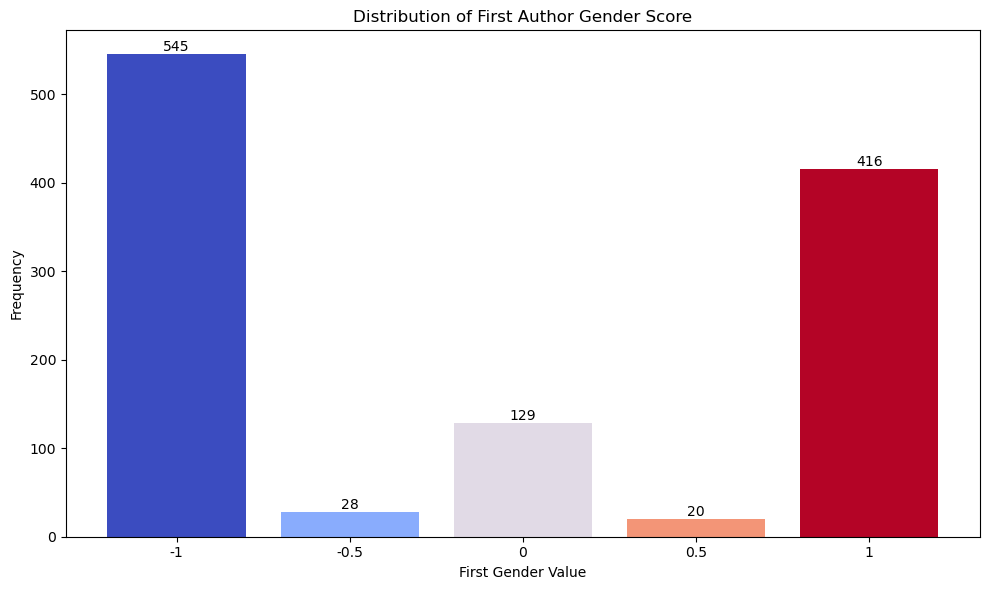

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Color mapping for genders
colors = {
    0: '#3B4CC0',  # -1: Male
    1: '#89ACFD',  # -0.5: Mostly male
    2: '#E1DAE6',  # 0: Neutral
    3: '#F39577',  # 0.5: Mostly female
    4: '#B40426'   # 1: Female
}

# First_Gender_Value
bins = np.array([-1, -0.5, 0, 0.5, 1])
labels = np.digitize(merged_df['First_Gender_Value'], bins) - 1
counts = np.bincount(labels, minlength=len(bins)-1)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(counts)), counts, color=[colors[i] for i in range(len(colors))])

# Annotate each bar with its height value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.title('Distribution of First Author Gender Score')
plt.xticks(range(len(counts)), labels=['-1', '-0.5', '0', '0.5', '1'])
plt.xlabel('First Gender Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [16]:
# Remove the rows where First_Gender is 'unknown' or 'andy'
merged_df = merged_df[~merged_df['First_Gender'].isin(['unknown', 'andy'])]

# Check the new size of merged_df to confirm rows are removed
print(f"Updated number of rows in merged_df: {merged_df.shape[0]}")



merged_df

Updated number of rows in merged_df: 1009


,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Gender_Counts,Gender_Numeric_Avg,First_Gender,First_Gender_Value
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"[female, female, male, male, unknown, unknown]",33.333333,...,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{'B0': 1, 'B124': 7, 'B-1': 4}","{'female': 2, 'male': 2, 'unknown': 2}",0.000000,female,1.0
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"[male, male, male, female, unknown, male, fema...",8.333333,...,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}","{'male': 6, 'female': 4, 'unknown': 1, 'mostly...",-0.208333,male,-1.0
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"[female, male]",0.000000,...,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}","{'female': 1, 'male': 1}",0.000000,female,1.0
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"[female, female]",0.000000,...,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{'B0': 1, 'B4': 11, 'B-1': 4}",{'female': 2},1.000000,female,1.0
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"[male, male, female, female, male, female, mal...",0.000000,...,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{'B-1': 11, 'B45': 2, 'B53': 1}","{'male': 7, 'female': 7}",0.000000,male,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"[female, male, male, male, female, female, mal...",0.000000,...,"[0, 32, 32, 32, -1, -1, -1, -1, -1, -1, -1, 32...","{1: 1.07, 13: 5.18, 19: 1.3, 27: 3.55, 30: 5.2...","[[('GBIF:2368377', 'Oryzias latipes', 1.0)], [...",2020,"{'L1': 1.07, 'L13': 5.18, 'L19': 1.3, 'L27': 3...","{'B0': 1, 'B32': 5, 'B-1': 7, 'B91': 1}"

In [17]:
filtered_df = merged_df[['title_s', 'authFullName_s', 'fileMain_s', 'TaxoEntitiesMD2_GBIF', 'Parsed_TopicsLDA', 'Parsed_BERTopics']]
filtered_df.to_excel('papers_v3_key_inputs.xlsx', index=False)

C:\Users\maria\AppData\Local\Temp\ipykernel_25120\3795690019.py:2: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  filtered_df.to_excel('papers_v3_key_inputs.xlsx', index=False)


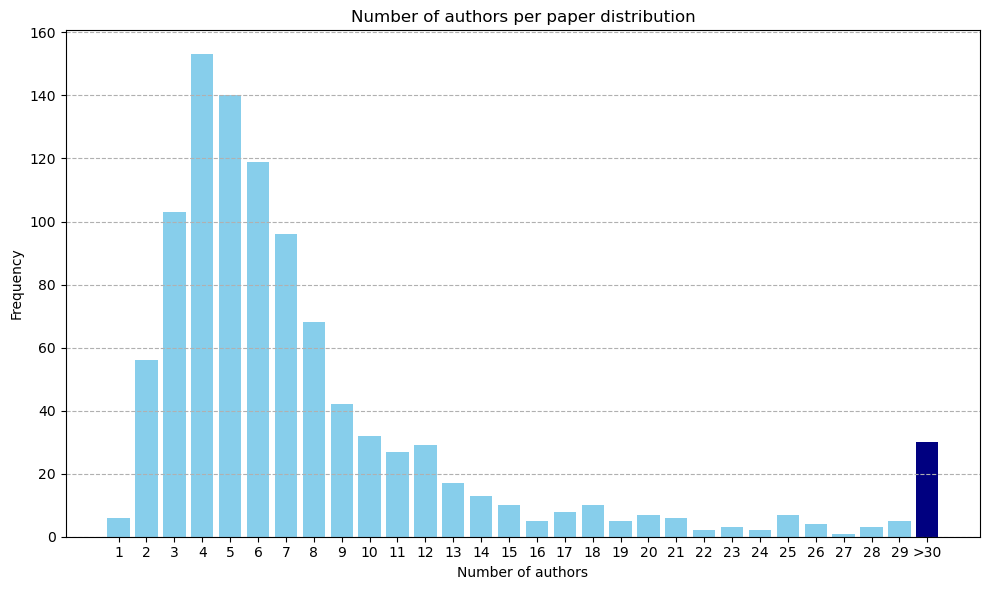

In [18]:

def plot_data_distribution(data, threshold=30, title='Distribution of Values', xlabel = 'Value'):
    """
    Plots the distribution of given data with values above a specified threshold grouped together.
    Adds the count for each bar above it.

    Parameters:
    - data: Pandas Series or list-like object containing the data to plot.
    - threshold: The threshold value above which data points are grouped into a single category.
    """
    # Create a Counter to count the frequency of the data points
    data_frequency = Counter(data)

    # Group data points above the threshold
    grouped_data = {k: v for k, v in data_frequency.items() if k <= threshold}
    grouped_data[f'>{threshold}'] = sum(v for k, v in data_frequency.items() if k > threshold)

    # Sort the keys so that the '>threshold' group appears at the end
    sorted_keys = sorted([k for k in grouped_data if isinstance(k, int)]) + [f'>{threshold}']
    sorted_values = [grouped_data[k] for k in sorted_keys]

    # Determine colors for each bar
    colors = ['skyblue' if k != f'>{threshold}' else 'navy' for k in sorted_keys]

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(sorted_keys)), sorted_values, color=colors)

    # Adding labels and title
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(range(len(sorted_keys)), labels=sorted_keys)

    # Adding grid and layout adjustment
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()

    # Display the plot
    plt.show()


total_authors = merged_df['Gender_Counts'].apply(lambda x: sum(x.values()))
plot_data_distribution(total_authors, threshold=30, title='Number of authors per paper distribution', xlabel = 'Number of authors')



C:\Users\maria\AppData\Local\Temp\ipykernel_25120\2795284199.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gender_counts = pd.DataFrame(index=sorted_keys, columns=colors.keys()).fillna(0)


Error: 'int' object has no attribute 'startswith'
Data causing the issue: {'data': 0        6
1       12
2        2
3        2
4       14
        ..
1134     8
1135    58
1136     5
1137    13
1138     8
Name: Gender_Counts, Length: 1009, dtype: int64, 'gender_data': 0       female
1         male
2       female
3       female
4         male
         ...  
1134    female
1135    female
1136    female
1137    female
1138      male
Name: First_Gender, Length: 1009, dtype: object, 'data_frequency': Counter({4: 153, 5: 140, 6: 119, 3: 103, 7: 96, 8: 68, 2: 56, 9: 42, 10: 32, 12: 29, 11: 27, 13: 17, 14: 13, 15: 10, 18: 10, 17: 8, 20: 7, 25: 7, 21: 6, 1: 6, 16: 5, 19: 5, 29: 5, 32: 4, 26: 4, 28: 3, 23: 3, 22: 2, 24: 2, 35: 2, 71: 2, 44: 1, 42: 1, 31: 1, 45: 1, 48: 1, 73: 1, 110: 1, 38: 1, 27: 1, 97: 1, 37: 1, 34: 1, 116: 1, 33: 1, 65: 1, 79: 1, 94: 1, 76: 1, 512: 1, 43: 1, 100: 1, 81: 1, 58: 1}), 'grouped_data': {6: 119, 12: 29, 2: 56, 14: 13, 17: 8, 5: 140, 10: 32, 7: 96, 15: 10, 4: 153, 20:

AttributeError: 'int' object has no attribute 'startswith'

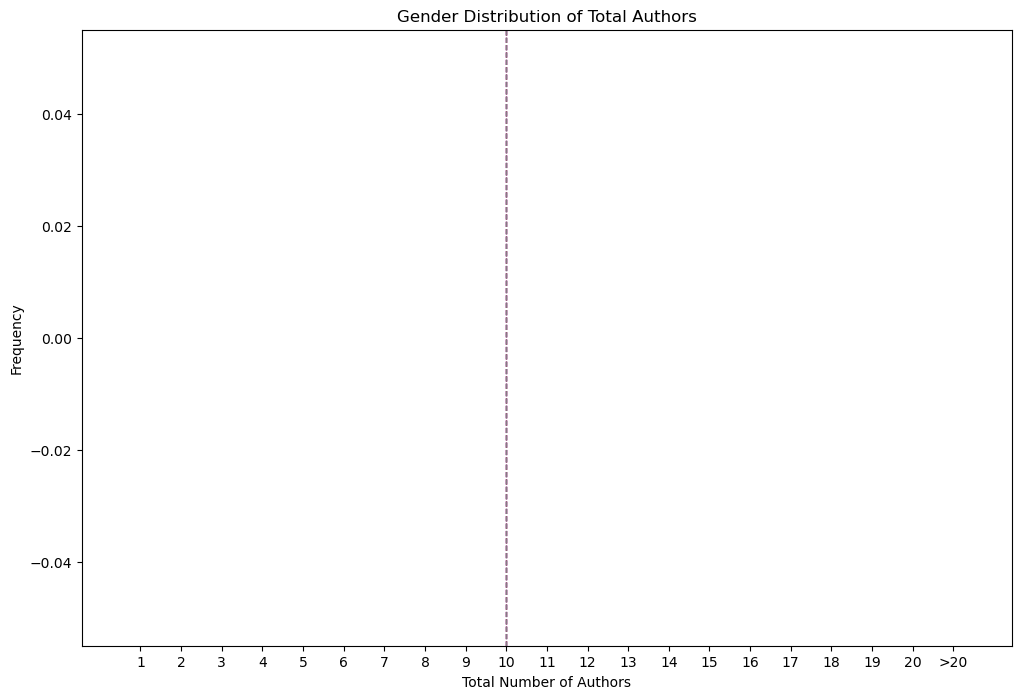

In [19]:

# Function to plot the stacked bar chart with labels
def plot_stacked_bar_with_labels(data, gender_data, threshold=30):
    try:
        # Create a Counter to count the frequency of the data points
        data_frequency = Counter(data)
        
        # Group data points above the threshold
        grouped_data = {k: v for k, v in data_frequency.items() if k <= threshold}
        grouped_data[f'>{threshold}'] = sum(v for k, v in data_frequency.items() if k > threshold)
        
        # Sort the keys so that the '>threshold' group appears at the end
        sorted_keys = sorted([k for k in grouped_data if isinstance(k, int)]) + [f'>{threshold}']
        sorted_keys = [str(key) for key in sorted_keys]  # Ensure all keys are strings
        
        # Create a dataframe to count gender distribution
        gender_counts = pd.DataFrame(index=sorted_keys, columns=colors.keys()).fillna(0)
        
        for x_value in sorted_keys:
            if x_value == f'>{threshold}':
                relevant_rows = merged_df[merged_df['Gender_Counts'].apply(lambda x: sum(x.values()) > threshold)]
            else:
                relevant_rows = merged_df[merged_df['Gender_Counts'].apply(lambda x: sum(x.values()) == int(x_value))]
            
            gender_distribution = relevant_rows['First_Gender'].value_counts()
            for gender, count in gender_distribution.items():
                gender_counts.at[x_value, gender] = count
        
        # Plotting
        gender_counts = gender_counts.fillna(0)  # Ensure no NaNs
        gender_counts = gender_counts.astype(int)  # Convert to integers for plotting
        
        plt.figure(figsize=(12, 8))
        
        # Plot stacked bar chart
        bottom_values = [0] * len(gender_counts.index)
        for gender in colors.keys():
            if gender in gender_counts.columns:
                bars = plt.bar(gender_counts.index, gender_counts[gender], bottom=bottom_values, color=colors[gender], label=gender)
                for bar, count in zip(bars, gender_counts[gender]):
                    if count > 5:  # Only label bars that are big enough
                        plt.text(
                            bar.get_x() + bar.get_width() / 2,
                            bar.get_y() + bar.get_height() / 2,
                            str(count),
                            ha='center',
                            va='center',
                            color='white',
                            fontsize=8,
                            fontweight='bold'
                        )
                bottom_values = [i + j for i, j in zip(bottom_values, gender_counts[gender])]
        
        # Calculate mean number of authors
        male_authors = merged_df[merged_df['First_Gender'].isin(['male', 'mostly_male'])]['Gender_Counts'].apply(lambda x: sum(x.values()))
        female_authors = merged_df[merged_df['First_Gender'].isin(['female', 'mostly_female'])]['Gender_Counts'].apply(lambda x: sum(x.values()))
        all_authors = merged_df['Gender_Counts'].apply(lambda x: sum(x.values()))

        mean_male_authors = np.mean(male_authors)
        mean_female_authors = np.mean(female_authors)
        mean_all_authors = np.mean(all_authors)

        # Adding vertical mean lines
        def get_closest_category_index(mean_value, categories):
            numeric_categories = [int(cat) for cat in categories if cat.isdigit()]
            numeric_categories.append(threshold + 1)  # Add an additional category for ">threshold"
            differences = [abs(mean_value - cat) for cat in numeric_categories]
            return numeric_categories[differences.index(min(differences))]
        
        mean_male_pos = get_closest_category_index(mean_male_authors, sorted_keys)
        mean_female_pos = get_closest_category_index(mean_female_authors, sorted_keys)
        mean_all_pos = get_closest_category_index(mean_all_authors, sorted_keys)

        plt.axvline(mean_male_pos, color='blue', linestyle='--', linewidth=1, label=f'Mean Male/Mostly Male Authors: {mean_male_authors:.2f}')
        plt.axvline(mean_female_pos, color='red', linestyle='--', linewidth=1, label=f'Mean Female/Mostly Female Authors: {mean_female_authors:.2f}')
        plt.axvline(mean_all_pos, color='grey', linestyle='--', linewidth=1, label=f'Mean All Authors: {mean_all_authors:.2f}')
        
        # Adding labels and title
        plt.xlabel('Total Number of Authors')
        plt.ylabel('Frequency')
        plt.title('Gender Distribution of Total Authors')
        plt.xticks(range(len(sorted_keys)), labels=sorted_keys)
        plt.legend(title='Gender')
        
        # Adding grid and layout adjustment
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        
        # Display the plot
        plt.show()
    
    except Exception as e:
        print(f"Error: {e}")
        print("Data causing the issue:", locals())
        raise

# Example usage
total_authors = merged_df['Gender_Counts'].apply(lambda x: sum(x.values()))
plot_stacked_bar_with_labels(total_authors, merged_df['First_Gender'], threshold=20)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode

# Prepare the data
data = merged_df['Gender_Numeric_Avg']

plt.figure(figsize=(10, 6))

# Normalize colors based on the desired range of -1 to 1
norm = plt.Normalize(-1, 1)  # Normalize between -1 and 1 for the colormap

# Histogram and KDE
hist = sns.histplot(data, kde=True, bins=30, alpha=0.4, color='gray', binrange=(-1,1))

# Map the data to the colormap
colors = [plt.cm.coolwarm(norm(value)) for value in np.linspace(-1, 1, len(hist.patches))]



# Assign colors to histogram bars
for bar, color in zip(hist.patches, colors):
    bar.set_facecolor(color)

# Compute statistics
mean_val = data.mean()
median_val = data.median()
mode_val = mode(data).mode[0]
std_dev = data.std()

plt.axvline(mean_val, color='grey', linestyle='--', linewidth=1)

# Text for statistics in the plot
stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nMode: {mode_val:.2f}\nStd Dev: {std_dev:.2f}'

# Place text with statistics in the upper left corner
plt.text(0.7, plt.ylim()[1] * 0.97, stats_text, fontsize=10, verticalalignment='top')

# Plot adjustments
plt.title('Distribution of Team Gender Score')
plt.xlabel('Gender Numeric Avg')
plt.ylabel('Density/Frequency')
plt.tight_layout()
plt.show()


labels: [0 0 0 ... 4 0 0]
counts: [680  12  61  11 244]


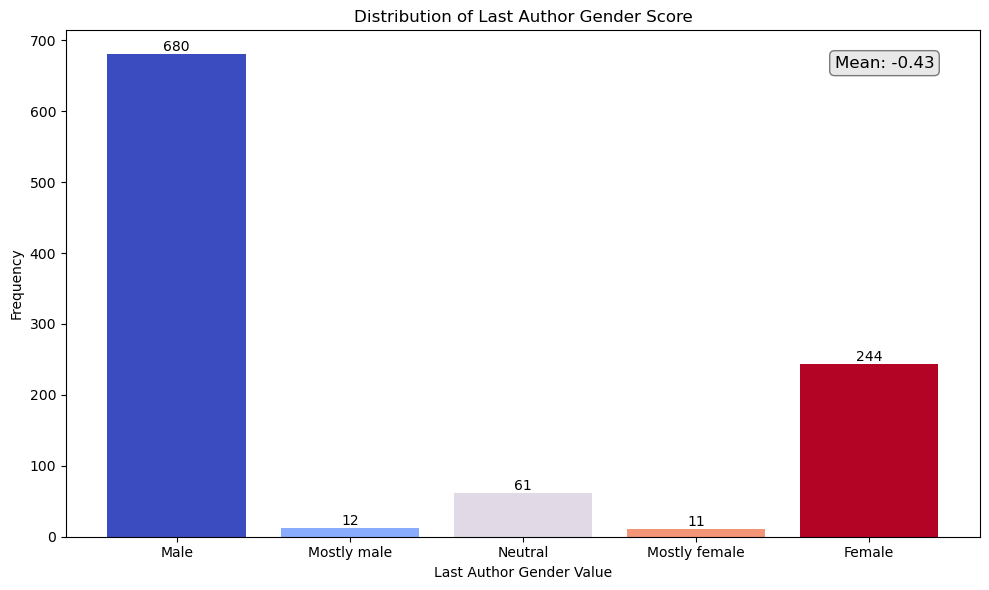

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Color mapping for genders
colors = {
    0: '#3B4CC0',  # -1: Male
    1: '#89ACFD',  # -0.5: Mostly male
    2: '#E1DAE6',  # 0: Neutral
    3: '#F39577',  # 0.5: Mostly female
    4: '#B40426'   # 1: Female
}


mapping_gender_value = {
    -1: 'Male',
    -0.5: 'Mostly male',
    0: 'Neutral',
    0.5: 'Mostly female',
    1: 'Female'
}

def plot_gender_distribution(gender_values, title, xlabel, name):
    bins = np.array([-1, -0.5, 0, 0.5, 1])
    labels = np.digitize(gender_values, bins) - 1
    counts = np.bincount(labels, minlength=len(bins)-1)
    
    # Calculate the mean value
    mean_value = np.mean(gender_values)
    
    print(f'labels: {labels}')
    print(f'counts: {counts}')
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(counts)), counts, color=[colors[i] for i in range(len(counts))])

    # Annotate each bar with its height value
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

    # Map the x-ticks to their corresponding gender labels
    mapped_labels = [mapping_gender_value[bins[i]] for i in range(len(counts))]
    plt.xticks(range(len(counts)), labels=mapped_labels)
    
    # Adding a textbox with the mean value
    textstr = f'Mean: {mean_value:.2f}'
    props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)
    plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
                   verticalalignment='top', horizontalalignment='right', bbox=props)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/Graphs/Visualizations/{name}_distribution.png')

    plt.show()
    
# Plot First_Gender_Value distribution
plot_gender_distribution(papers_df['Last_Gender_Value'], 'Distribution of Last Author Gender Score', 'Last Author Gender Value', 'LA')


labels: [4 4 0 ... 4 4 0]
counts: [545  28   0  20 415]


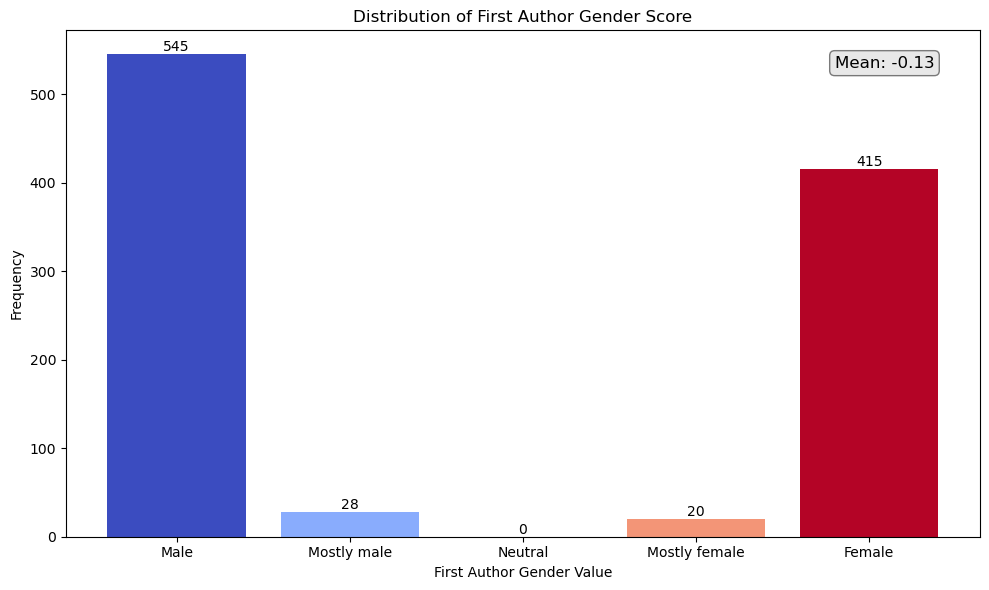

In [9]:

# Plot First_Gender_Value distribution
plot_gender_distribution(papers_df['First_Gender_Value'], 'Distribution of First Author Gender Score', 'First Author Gender Value', 'FA')


Now we get the Last authors and its distributions

In [ ]:
# Function to get the last gender and its corresponding value
def get_last_gender_and_value(genders):
    last_gender = genders[-1] if genders else 'error'  # handle empty lists if any
    last_gender_value = gender_values.get(last_gender, 0)
    return pd.Series([last_gender, last_gender_value])

# Apply the function to create new columns for Last_Gender and Last_Gender_Value
merged_df[['Last_Gender', 'Last_Gender_Value']] = merged_df['Genders'].apply(get_last_gender_and_value)


In [ ]:
merged_df[['First_Gender_Value', 'Last_Gender_Value']]

In [ ]:
merged_df[merged_df['First_Gender_Value'] == 'error']

In [20]:

# Plot Last_Gender_Value distribution
plot_gender_distribution(merged_df['Last_Gender_Value'], 'Distribution of Last Author Gender Score', 'Last Gender Value')


NameError: name 'plot_gender_distribution' is not defined

# Entities - Counting

In [21]:
'''# Function to flatten a list of lists (after converting from string representation) --> Functioin thought for handling the TaxRef multi-entity returns
def flatten_list_of_lists(row):
    # Convert the string representation to actual list
    #lists = ast.literal_eval(row) #string_to_list(row)
    # Flatten the list of lists
    flattened = [(taxref, name) for sublist in row for (taxref, name, _) in sublist]
    return flattened


def count_unique_entities_per_row_and_sort(entities_column):
    """
    Receives a pandas Series where each row contains a list or a string representation of a list of entities.
    Returns a pandas Series where each row contains an OrderedDict with the count of unique entities or tuples,
    sorted by their counts in descending order. It handles case insensitivity for strings and maintains the integrity of tuples.
    """
    def count_entities(row_entities):
        try:
            if isinstance(row_entities, str):
                # Safely convert string representation to actual list
                row_entities = ast.literal_eval(row_entities)

            row_entities_list = []
            for entity in row_entities:
                if isinstance(entity, tuple):
                    # Handle tuples by keeping them intact
                    row_entities_list.append(entity)
                elif isinstance(entity, str):
                    # Convert strings to lowercase for case insensitivity
                    row_entities_list.append(entity.lower())
                else:
                    # Ignore non-string, non-tuple entities
                    continue

            # Count entities/tuples and sort them
            entity_counter = Counter(row_entities_list)
            sorted_entities = dict(sorted(entity_counter.items(), key=lambda x: x[1], reverse=True))

            return sorted_entities
        except Exception as e:
            print(f"Error processing row: {e}")
            return {}

    # Apply the count_entities function to each row in the entities_column
    return entities_column.apply(count_entities)

count_unique_entities_per_row_and_sort(merged_df['TaxoEntitiesMD2_GBIF'])'''

'# Function to flatten a list of lists (after converting from string representation) --> Functioin thought for handling the TaxRef multi-entity returns\ndef flatten_list_of_lists(row):\n    # Convert the string representation to actual list\n    #lists = ast.literal_eval(row) #string_to_list(row)\n    # Flatten the list of lists\n    flattened = [(taxref, name) for sublist in row for (taxref, name, _) in sublist]\n    return flattened\n\n\ndef count_unique_entities_per_row_and_sort(entities_column):\n    """\n    Receives a pandas Series where each row contains a list or a string representation of a list of entities.\n    Returns a pandas Series where each row contains an OrderedDict with the count of unique entities or tuples,\n    sorted by their counts in descending order. It handles case insensitivity for strings and maintains the integrity of tuples.\n    """\n    def count_entities(row_entities):\n        try:\n            if isinstance(row_entities, str):\n                # Safe

In [22]:
type(merged_df['TaxoEntitiesMD2_GBIF'])

pandas.core.series.Series

In [23]:
merged_df['TaxoEntitiesMD2_GBIF'].iloc[0]

"[[('GBIF:3183002', 'clove', 0.7634411454200745)], [('GBIF:3183002', 'Syzygium aromaticum', 1.0)], [('GBIF:3075433', 'pepper', 1.0), ('GBIF:2932937', 'pepper', 1.0), ('GBIF:3086347', 'pepper', 1.0), ('GBIF:3086351', 'pepper', 1.0), ('GBIF:3086324', 'pepper', 1.0)], [('GBIF:3060998', 'cassava', 1.0), ('GBIF:4930703', 'cassava', 1.0)], [('GBIF:2436436', 'Humans', 1.0)], [('GBIF:9512109', 'Ceraclea ambany', 0.7442896366119385)], [('GBIF:3183002', 'clove', 0.7634411454200745)], [('GBIF:3183002', 'clove', 0.7634411454200745)], [('GBIF:4801207', 'Bamboosiella', 0.7778515219688416)], [('GBIF:5014', 'Myrtaceae', 1.0)], [('GBIF:5386', 'Fabaceae', 1.0)], [('GBIF:6640', 'Moraceae', 1.0)], [('GBIF:2396', 'Rutaceae', 1.0)], [('GBIF:2984565', 'Artocarpus heterophyllus', 0.9999999403953552)], [('GBIF:3190002', 'Litchi chinensis', 1.0)], [('GBIF:2984573', 'Artocarpus altilis', 1.0), ('GBIF:8032558', 'Artocarpus altilis', 1.0)], [('GBIF:2762752', 'banana', 1.0), ('GBIF:2762950', 'banana', 1.0), ('GBIF:

In [24]:
def safe_flatten_and_count(row):
    try:
        # Assuming the row is a properly formatted string list of lists
        evaluated_row = ast.literal_eval(row)
        flattened = [(item[0], item[1]) for sublist in evaluated_row for item in sublist]
        return Counter(flattened)
    except ValueError:
        # Handle or log the error as appropriate
        return Counter()

# Apply this function to the 'TaxoEntitiesMD2_GBIF' column
# This assumes the rest of your DataFrame manipulation has worked as expected
merged_df['TaxoEntities_Count'] = merged_df['TaxoEntitiesMD2_GBIF'].apply(safe_flatten_and_count)
print(merged_df['TaxoEntities_Count'].iloc[0])

Counter({('GBIF:3183002', 'clove'): 11, ('GBIF:2762752', 'banana'): 7, ('GBIF:2762950', 'banana'): 7, ('GBIF:5204104', 'banana'): 7, ('GBIF:4270898', 'banana'): 7, ('GBIF:2762680', 'banana'): 7, ('GBIF:3060998', 'cassava'): 4, ('GBIF:4930703', 'cassava'): 4, ('GBIF:8082978', 'Gliricidia sepium'): 3, ('GBIF:2953986', 'Gliricidia sepium'): 3, ('GBIF:8322698', 'Gliricidia sepium'): 3, ('GBIF:5239316', 'Poria geoderma'): 3, ('GBIF:3152235', 'Pachira aquatica'): 2, ('GBIF:2703197', 'ma bamboo'): 2, ('GBIF:3190001', 'lychee'): 2, ('GBIF:3190002', 'lychee'): 2, ('GBIF:3183002', 'Syzygium aromaticum'): 1, ('GBIF:3075433', 'pepper'): 1, ('GBIF:2932937', 'pepper'): 1, ('GBIF:3086347', 'pepper'): 1, ('GBIF:3086351', 'pepper'): 1, ('GBIF:3086324', 'pepper'): 1, ('GBIF:2436436', 'Humans'): 1, ('GBIF:9512109', 'Ceraclea ambany'): 1, ('GBIF:4801207', 'Bamboosiella'): 1, ('GBIF:5014', 'Myrtaceae'): 1, ('GBIF:5386', 'Fabaceae'): 1, ('GBIF:6640', 'Moraceae'): 1, ('GBIF:2396', 'Rutaceae'): 1, ('GBIF:2984

C:\Users\maria\AppData\Local\Temp\ipykernel_25120\1522346.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['TaxoEntities_Count'] = merged_df['TaxoEntitiesMD2_GBIF'].apply(safe_flatten_and_count)


In [25]:
'''from ast import literal_eval
from collections import Counter

def safe_flatten_and_count_taxoreference(row):
    # One taxoref seems to have multiple names so we are counting by name an not by taxoref
    
    try:
        # Safely evaluate the row to convert it from a string representation to a list of lists of tuples
        evaluated_row = literal_eval(row)
        # Flatten the list and extract only the taxoreference from each tuple
        taxoreferences = [item[1] for sublist in evaluated_row for item in sublist]
        # Count occurrences of each unique taxoreference
        return Counter(taxoreferences)
    except ValueError as e:
        # Handle or log the error as appropriate
        print(f"Error processing row: {e}")
        return Counter()

# Assuming merged_df is your DataFrame and 'TaxoEntitiesMD2_GBIF' contains the string representations
merged_df['TaxoEntities_Taxoreference_Count'] = merged_df['TaxoEntitiesMD2_GBIF'].apply(safe_flatten_and_count_taxoreference)
'''


'from ast import literal_eval\nfrom collections import Counter\n\ndef safe_flatten_and_count_taxoreference(row):\n    # One taxoref seems to have multiple names so we are counting by name an not by taxoref\n    \n    try:\n        # Safely evaluate the row to convert it from a string representation to a list of lists of tuples\n        evaluated_row = literal_eval(row)\n        # Flatten the list and extract only the taxoreference from each tuple\n        taxoreferences = [item[1] for sublist in evaluated_row for item in sublist]\n        # Count occurrences of each unique taxoreference\n        return Counter(taxoreferences)\n    except ValueError as e:\n        # Handle or log the error as appropriate\n        print(f"Error processing row: {e}")\n        return Counter()\n\n# Assuming merged_df is your DataFrame and \'TaxoEntitiesMD2_GBIF\' contains the string representations\nmerged_df[\'TaxoEntities_Taxoreference_Count\'] = merged_df[\'TaxoEntitiesMD2_GBIF\'].apply(safe_flatten_and

In [26]:
print(merged_df['TaxoEntities_Count'].iloc[0])


Counter({('GBIF:3183002', 'clove'): 11, ('GBIF:2762752', 'banana'): 7, ('GBIF:2762950', 'banana'): 7, ('GBIF:5204104', 'banana'): 7, ('GBIF:4270898', 'banana'): 7, ('GBIF:2762680', 'banana'): 7, ('GBIF:3060998', 'cassava'): 4, ('GBIF:4930703', 'cassava'): 4, ('GBIF:8082978', 'Gliricidia sepium'): 3, ('GBIF:2953986', 'Gliricidia sepium'): 3, ('GBIF:8322698', 'Gliricidia sepium'): 3, ('GBIF:5239316', 'Poria geoderma'): 3, ('GBIF:3152235', 'Pachira aquatica'): 2, ('GBIF:2703197', 'ma bamboo'): 2, ('GBIF:3190001', 'lychee'): 2, ('GBIF:3190002', 'lychee'): 2, ('GBIF:3183002', 'Syzygium aromaticum'): 1, ('GBIF:3075433', 'pepper'): 1, ('GBIF:2932937', 'pepper'): 1, ('GBIF:3086347', 'pepper'): 1, ('GBIF:3086351', 'pepper'): 1, ('GBIF:3086324', 'pepper'): 1, ('GBIF:2436436', 'Humans'): 1, ('GBIF:9512109', 'Ceraclea ambany'): 1, ('GBIF:4801207', 'Bamboosiella'): 1, ('GBIF:5014', 'Myrtaceae'): 1, ('GBIF:5386', 'Fabaceae'): 1, ('GBIF:6640', 'Moraceae'): 1, ('GBIF:2396', 'Rutaceae'): 1, ('GBIF:2984

In [27]:
type(merged_df['TaxoEntities_Count'].iloc[16])

collections.Counter

In [28]:
merged_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Gender_Counts,Gender_Numeric_Avg,First_Gender,First_Gender_Value,TaxoEntities_Count
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"[female, female, male, male, unknown, unknown]",33.333333,...,"{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{'B0': 1, 'B124': 7, 'B-1': 4}","{'female': 2, 'male': 2, 'unknown': 2}",0.000000,female,1.0,"{('GBIF:3183002', 'clove'): 11, ('GBIF:3183002..."
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"[male, male, male, female, unknown, male, fema...",8.333333,...,"{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}","{'male': 6, 'female': 4, 'unknown': 1, 'mostly...",-0.208333,male,-1.0,"{('GBIF:9065640', 'Tyto novaehollandiae novaeh..."
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"[female, male]",0.000000,...,"{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}","{'female': 1, 'male': 1}",0.000000,female,1.0,{}
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"[female, female]",0.000000,...,"{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{'B0': 1, 'B4': 11, 'B-1': 4}",{'female': 2},1.000000,female,1.0,"{('GBIF:5786457', 'Sateré Marmoset'): 3, ('GBI..."
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"[male, male, female, female, male, female, mal...",0.000000,...,"{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{'B-1': 11, 'B45': 2, 'B53': 1}","{'male': 7, 'female': 7}",0.000000,male,-1.0,"{('GBIF:4494312', 'Spilomena beata Blüthgen'):..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"[female, male, male, male, female, female, mal...",0.000000,...,"{1: 1.07, 13: 5.18, 19: 1.3, 27: 3.55, 30: 5.2...","[[('GBIF:2368377', 'Oryzias latipes', 1.0)], [...",2020,"{'L1': 1.07, 'L13': 5.18, 'L19': 1.3, 'L27': 3...","{'B0': 1, 'B32': 5, 'B-1': 7, 'B91': 1}","{'female': 3, 'male': 5}",-0.250000,female,1.0,"{('GBIF:2368377', 'Oryzias latipes'): 2, ('GBI.

In [29]:
count_zero = (merged_df['First_Gender_Value'] == 0).sum()
count_zero

0

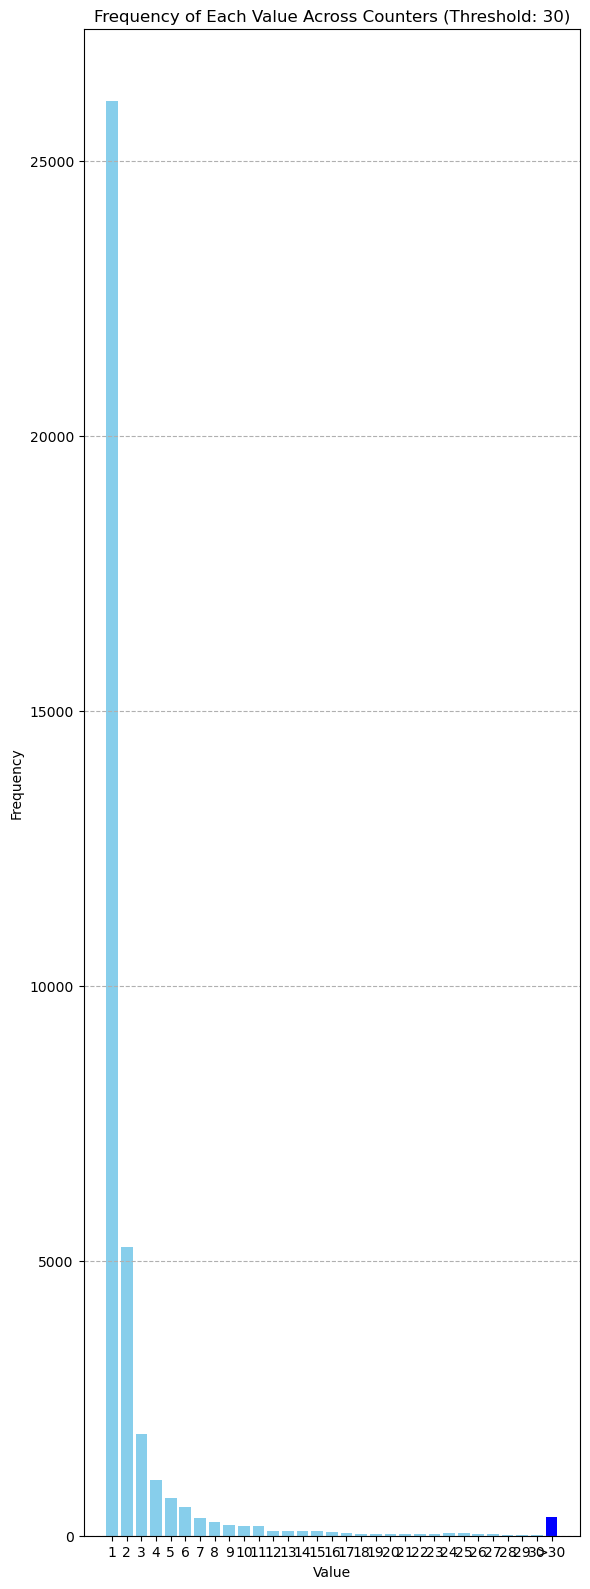

In [30]:


# Define the threshold value
threshold = 30

# Simulating the example DataFrame column with a list of Counter objects
counters_list = merged_df['TaxoEntities_Count'].tolist()

# Create a Counter to count the frequency of values
value_frequency = Counter()

for counter in counters_list:
    for value in counter.values():
        value_frequency[value] += 1

# Group counts above the threshold
grouped_values = {k: v for k, v in value_frequency.items() if k <= threshold}
grouped_values[f'>{threshold}'] = sum(v for k, v in value_frequency.items() if k > threshold)

# Sort the keys so that the '>threshold' group appears at the end
sorted_keys = sorted([k for k in grouped_values if isinstance(k, int)]) + [f'>{threshold}']
sorted_values = [grouped_values[k] for k in sorted_keys]

# Determine colors for each bar
colors = ['skyblue' if k != f'>{threshold}' else 'blue' for k in sorted_keys]

plt.figure(figsize=(6, 16))
plt.bar(range(len(sorted_keys)), sorted_values, color=colors)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Frequency of Each Value Across Counters (Threshold: {threshold})')
plt.xticks(range(len(sorted_keys)), labels=sorted_keys)

plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()


Total sum of all entity counts: 96926
Total number of unique entity keys: 19670


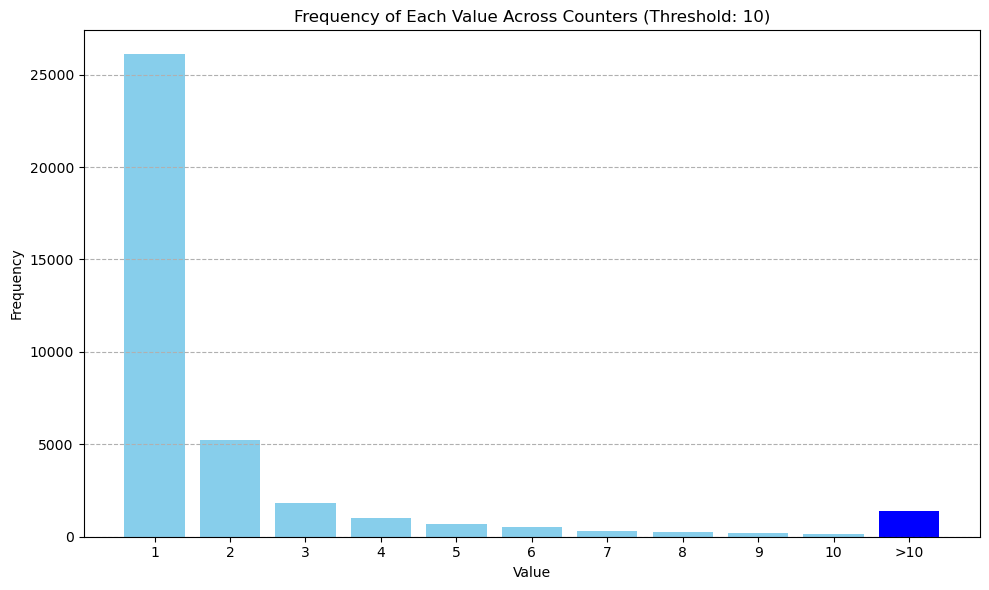

In [31]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


# Define the threshold value for plotting
threshold = 10

# Create a Counter to aggregate all counts and to count the frequency of values
total_entity_counts = Counter()
value_frequency = Counter()

for counter in merged_df['TaxoEntities_Count']:
    total_entity_counts.update(counter)
    for value in counter.values():
        value_frequency[value] += 1

# Total sum of all entity counts
total_sum_of_counts = sum(total_entity_counts.values())

# Total number of unique entity keys
unique_entity_keys_count = len(total_entity_counts)

# Print the results
print("Total sum of all entity counts:", total_sum_of_counts)
print("Total number of unique entity keys:", unique_entity_keys_count)

# Plotting the frequency of each value across counters
# Group counts above the threshold
grouped_values = {k: v for k, v in value_frequency.items() if k <= threshold}
grouped_values[f'>{threshold}'] = sum(v for k, v in value_frequency.items() if k > threshold)

# Sort the keys so that the '>threshold' group appears at the end
sorted_keys = sorted([k for k in grouped_values if isinstance(k, int)]) + [f'>{threshold}']
sorted_values = [grouped_values[k] for k in sorted_keys]

# Determine colors for each bar
colors = ['skyblue' if k != f'>{threshold}' else 'blue' for k in sorted_keys]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_keys)), sorted_values, color=colors)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Frequency of Each Value Across Counters (Threshold: {threshold})')
plt.xticks(range(len(sorted_keys)), labels=sorted_keys)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


C:\Users\maria\AppData\Local\Temp\ipykernel_25120\3763428051.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Num_Unique_Entities'] = merged_df['TaxoEntities_Count'].apply(lambda x: len(x))
C:\Users\maria\AppData\Local\Temp\ipykernel_25120\3763428051.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Entity_Buckets'] = merged_df['Num_Unique_Entities'].apply(categorize_into_buckets)


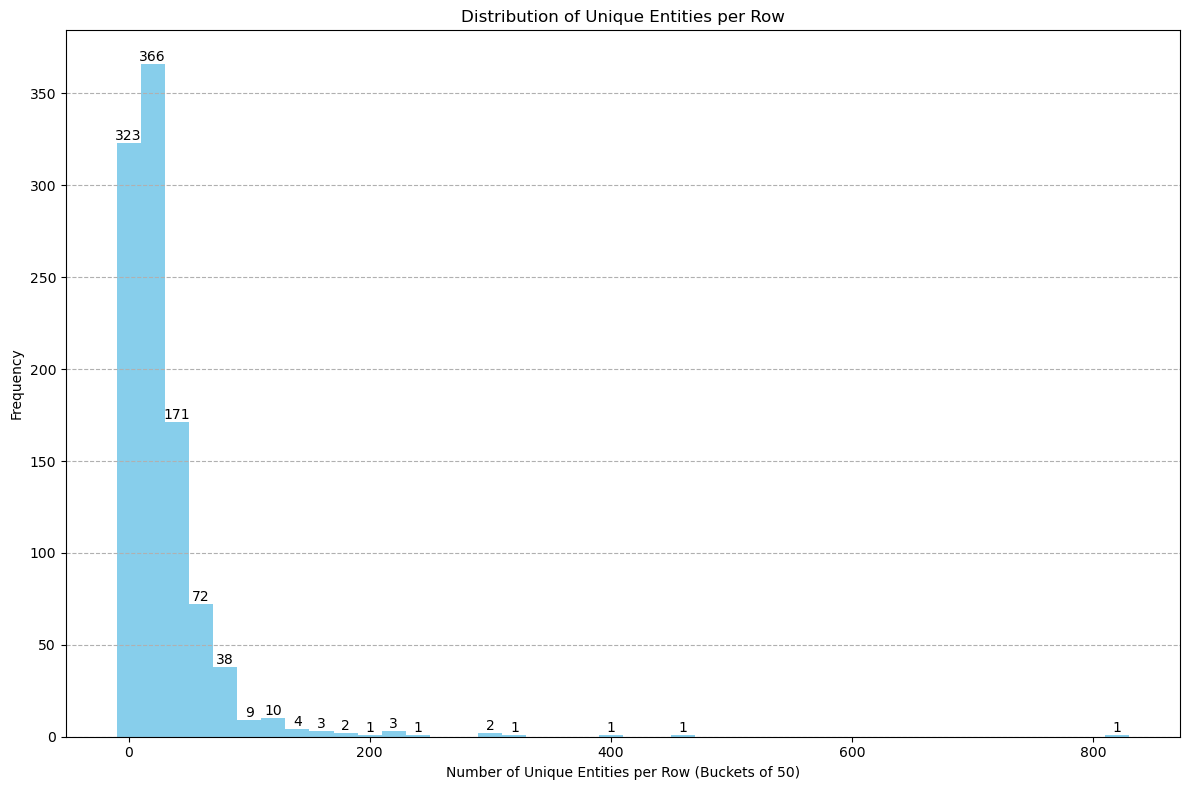

In [32]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Assuming merged_df is already defined and loaded

# Calculate the number of unique entities per row
merged_df['Num_Unique_Entities'] = merged_df['TaxoEntities_Count'].apply(lambda x: len(x))

# Define the bucket size
bucket_size = 20

# Create a function to categorize the number of unique entities into buckets of 50
def categorize_into_buckets(num):
    return (num // bucket_size) * bucket_size

# Apply the function to categorize the number of unique entities
merged_df['Entity_Buckets'] = merged_df['Num_Unique_Entities'].apply(categorize_into_buckets)

# Count the frequency of each bucket
bucket_counts = merged_df['Entity_Buckets'].value_counts().sort_index()

# Plotting the distribution of unique entities per row in buckets of 50
plt.figure(figsize=(12, 8))
bars = plt.bar(bucket_counts.index, bucket_counts.values, width=bucket_size, color='skyblue')

# Annotate each bar with its height value
for bar in bars:
    height = bar.get_height()
    if height > 0:  # Only label bars that have non-zero height
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Number of Unique Entities per Row (Buckets of 50)')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Entities per Row')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [33]:
merged_df[merged_df['Num_Unique_Entities']>200]

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Gender_Counts,Gender_Numeric_Avg,First_Gender,First_Gender_Value,TaxoEntities_Count,Num_Unique_Entities,Entity_Buckets
39,['Modifications of the rainforest frugivore co...,Ecological Applications,"['Boissier', 'Feer', 'Henry', 'Forget']","['Olivier Boissier', 'François Feer', 'Pierre‐...",['Tropical rainforests worldwide are under inc...,https://hal.science/hal-02469944/document,2020.0,True,"[male, male, unknown, male]",25.000000,...,2020,"{'L6': 2.99, 'L35': 96.34}","{'B-1': 13, 'B120': 1}","{'male': 3, 'unknown': 1}",-0.750000,male,-1.0,"{('GBIF:8802', 'Sapotaceae'): 39, ('GBIF:2439'...",213,200
184,['Communities in infrastructure habitats are s...,Journal of Applied Ecology,"['Dániel‐ferreira', 'Fourcade', 'Bommarco', 'W...","['Juliana Dániel‐ferreira', 'Yoan Fourcade', '...",['Biodiversity linked to traditionally managed...,https://hal.u-pec.fr/hal-04199810/document,NaN,True,"[female, male, male, male, male]",0.000000,...,2023,"{'L17': 3.0, 'L22': 59.96, 'L49': 6.93, 'L58':...","{'B0': 1, 'B-1': 9, 'B68': 1, 'B120': 2}","{'female': 1, 'male': 4}",-0.600000,female,1.0,"{('GBIF:3258819', 'Alpha'): 1, ('GBIF:1707430'...",461,460
314,['High ecosystem service delivery potential of...,Journal of Applied Ecology,"['Valdés', 'Lenoir', 'de Frenne', 'Andrieu', '...","['Alicia Valdés', 'Jonathan Roger Michel Henri...",['Global forest loss and fragmentation have st...,https://hal.inrae.fr/hal-02618817/document,2019.0,True,"[female, male, male, female, male, male, femal...",3.571429,...,2020,"{'L17': 17.86, 'L22': 5.65, 'L58': 18.85, 'L81...","{'B0': 1, 'B-1': 8, 'B29': 4, 'B1': 2, 'B49': ...","{'female': 10, 'male': 16, 'unknown': 1, 'most...",-0.232143,female,1.0,"{('GBIF:5', 'fungi'): 1, ('GBIF:216', 'Insecta...",838,820
333,"['Taxonomic, phylogenetic and functional diver...",Journal of Ecology,"['de Pauw', 'Meeussen', 'Govaert', 'Sanczuk', ...","['Karen de Pauw', 'Camille Meeussen', 'Sanne G...","[""Forest biodiversity world-wide is affected b...",https://hal.science/hal-03362851/document,NaN,True,"[female, mostly_female, female, male, male, ma...",3.846154,...,2021,"{'L17': 38.99, 'L58': 2.02, 'L86': 8.14, 'L100...","{'B-1': 15, 'B57': 1, 'B29': 3, 'B49': 2, 'B0'...","{'female': 5, 'mostly_female': 2, 'male': 17, ...",-0.442308,female,1.0,"{('GBIF:1673043', 'Synthesia'): 1, ('GBIF:2878...",310,300
396,['Metabarcoding and ecological interaction net...,Journal of Applied Ecology,"['Ollivier', 'Lesieur', 'Tavoillot', 'Bénetièr...","['Mélodie Ollivier', 'Vincent Lesieur', 'Johan...",['1. Classical biological control (CBC) can be...,https://hal.science/hal-03695123/document,2021.0,True,"[female, male, male, female, unknown, unknown]",33.333333,...,2022,"{'L10': 1.74, 'L20': 79.08, 'L66': 8.31, 'L78'...","{'B0': 1, 'B-1': 8, 'B5': 1, 'B33': 4, 'B120':...","{'female': 2, 'male': 2, 'unknown': 2}",0.000000,female,1.0,"{('GBIF:8228544', 'Sonchus oleraceus'): 105, (...",312,300
519,['Does phenology explain plant–pollinator inte...,Oikos,"['de Manincor', 'Hautekeete', 'Piquot', 'Schat...","['Natasha de Manincor', 'Nina Hautekeete', 'Yv...","['For plant–pollinator interactions to occur, ...",https://hal.science/hal-02942299/document,2020.0,True,"[female, female, male, male, male, male]",0.000000,...,2020,"{'L20': 1.0, 'L22': 1.22, 'L58': 2.09, 'L103':...","{'B0': 1, 'B-1': 12, 'B24': 1, 'B99': 1, 'B120...","{'female': 2, 'male': 4}",-0.333333,female,1.0,"{('GBIF:216', 'insect'): 11, ('GBIF:5123443', ...",411,400
571,['Nutritional grouping of marine forage specie...,Oikos,"['Chouvelon', 'Gilbert', 'Caurant', 'Méndez‐fe...","['Tiphaine Chouvelon', 'Lola Gilbert', 'Floren...",['By transferring energy and nutrients from pl...,https://hal.science/hal-03684022/document,NaN,True,"[female, female, female, female, male, female,...",0.000000,...,2023,"{'L88': 3.8, 'L107': 1

In [34]:
merged_df[merged_df['Num_Unique_Entities']==0]

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Gender_Counts,Gender_Numeric_Avg,First_Gender,First_Gender_Value,TaxoEntities_Count,Num_Unique_Entities,Entity_Buckets
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"[female, male]",0.000000,...,2019,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}","{'female': 1, 'male': 1}",0.000000,female,1.0,{},0,0
49,['A case for using litter breakdown to assess ...,Ecological Applications,"['Gessner', 'Chauvet']","['Mark O. Gessner', 'Eric Chauvet']",['Assessment of the condition of ecosystems is...,https://hal.science/hal-00870744/document,NaN,True,"[male, male]",0.000000,...,2013,"{'L93': 1.96, 'L145': 96.21}",{'B0': 1},{'male': 2},-1.000000,male,-1.0,{},0,0
98,['Intraspecific trait variability mediates the...,Journal of Ecology,"['Jung', 'Albert', 'Violle', 'Kunstler', 'Louc...","['Vincent Jung', 'Cécile H. Albert', 'C. Violl...",['Climate change is expected to increase the m...,https://hal.science/hal-00949680/document,NaN,True,"[male, female, unknown, unknown, unknown, unkn...",66.666667,...,2014,"{'L25': 42.49, 'L69': 10.11, 'L188': 10.97, 'L...",{'B0': 1},"{'male': 1, 'female': 1, 'unknown': 4}",0.000000,male,-1.0,{},0,0
118,['Not even wrong: Comment by Loreau and Hector'],Ecology,"['Loreau', 'Hector']","['Michel Loreau', 'Andy Hector']",['The Loreau and Hector (2019) Comment on our ...,https://hal.science/hal-02353008/document,NaN,True,"[male, male]",0.000000,...,2020,"{'L52': 20.61, 'L94': 2.08, 'L135': 5.32, 'L18...","{'B0': 1, 'B-1': 3}",{'male': 2},-1.000000,male,-1.0,{},0,0
244,['The three regimes of spatial recovery'],Ecology,"['Zelnik', 'Loreau', 'Arnoldi']","['Yuval R Zelnik', 'Michel Loreau', 'Jean-Fran...","[""An enduring challenge for ecology is identif...",https://hal.science/hal-02350650/document,NaN,True,"[male, male, male]",0.000000,...,2019,"{'L2': 5.75, 'L81': 75.65, 'L125': 11.67, 'L18...","{'B0': 1, 'B45': 7, 'B-1': 1}",{'male': 3},-1.000000,male,-1.0,{},0,0
275,['Quality matters: Stoichiometry of resources ...,Ecology Letters,"['Pichon', 'Thébault', 'Lacroix', 'Gounand']","['Benoît Pichon', 'Elisa Thébault', 'Gérard La...",['Species dispersal and resource spatial flows...,https://hal.science/hal-04164752/document,2023.0,True,"[male, female, male, female]",0.000000,...,2023,"{'L2': 9.84, 'L61': 2.12, 'L75': 54.22, 'L81':...","{'B0': 1, 'B-1': 10}","{'male': 2, 'female': 2}",0.000000,male,-1.0,{},0,0
280,['Species richness and food‐web structure join...,Ecology Letters,"['Danet', 'Mouchet', 'Bonnaffé', 'Thébault', '...","['Alain Danet', 'Maud Mouchet', 'Willem Bonnaf...",['Biodiversity–ecosystem functioning and food-...,https://hal.science/hal-03766980/document,2021.0,True,"[male, female, male, female, male]",0.000000,...,2022,"{'L2': 21.54, 'L55': 1.57, 'L63': 1.9, 'L125':...","{'B-1': 7, 'B3': 1, 'B45': 3}","{'male': 3, 'female': 2}",-0.200000,male,-1.0,{},0,0
286,['A fast re‐sampling method for using reliabil...,Ecology,"['Jarić', 'Buettel', 'Brook']","['Ivan Jarić', 'Jessie C Buettel', 'Barry W Br...","[""We appreciate Solow's (2023) interest in the...",https://hal.science/hal-04408048/document,NaN,True,"[male, female, male]",0.000000,...,2024,{'L26': 99.83},"{'B0': 1, 'B103': 1}","{'male': 2, 'female': 1}",-0.333333,male,-1.0,{},0,0
389,['Optimising spatial distribution of mass‐flow...,Journal of Applied Ecology,"['Desaegher', 'Sheeren', 'Ouin']","['James Desaegher', 'David Sheeren', 'Annie Ou...",['The addition of floral resources is often re...,https://hal.inrae.fr/hal-03278964/document,NaN,True,"[male, male, female]",0.000000,...,2021,"{'L6': 2.75, 'L11': 7.84, 'L20': 1.23, 'L58': ...",{'B0': 1},"{'male': 2, 'f

In [35]:

# Flatten all counts into a single list
all_counts = [count for counter in counters_list for count in counter.values()]

# Count the frequency of each count
frequency_of_counts = Counter(all_counts)

# Now, frequency_of_counts is a Counter where each key is a count from the original Counters,
# and each value is how many times that count occurred across all Counters.

# Example: How many times a frequency of 1 occurred
print(f"Frequency of 1: {frequency_of_counts[1]}")
print(frequency_of_counts)
# To print more statistics like maximum frequency, minimum frequency, etc.
max_frequency = max(frequency_of_counts.values())
min_frequency = min(frequency_of_counts.values())
num_counts = sum(frequency_of_counts.values())
average_frequency = statistics.mean(frequency_of_counts.keys())
num_unique_frequencies = len(frequency_of_counts)

print(f"Maximum frequency: {max_frequency}")
print(f"Minimum frequency: {min_frequency}")
print(f"Total number of counts (instances of frequencies): {num_counts}")
print(f"Average frequency: {average_frequency:.2f}")
print(f"Number of unique frequencies: {num_unique_frequencies}")


# Assuming counters_list is your list of Counter objects
# Aggregate all Counter objects into a single Counter
aggregated_counter = sum(counters_list, Counter())

# Find the most common element and its count
most_common_element, highest_count = aggregated_counter.most_common(1)[0]

print(f"The element with the highest count: {most_common_element} (Count: {highest_count})")

# Flatten all counts into a single list
all_counts = [count for counter in counters_list for count in counter.values()]

# Count the frequencies of each count
frequency_of_counts = Counter(all_counts)

# Find the count with the highest frequency
highest_frequency_count, highest_frequency = frequency_of_counts.most_common(1)[0]

print(f"The count with the highest frequency of occurrence: {highest_frequency_count} (Frequency: {highest_frequency})")
total_counter = sum(merged_df['TaxoEntities_Count'], Counter())
highest_counts = total_counter.most_common(10)
highest_counts

Frequency of 1: 26089
Counter({1: 26089, 2: 5251, 3: 1843, 4: 1008, 5: 691, 6: 531, 7: 320, 8: 249, 9: 190, 11: 172, 10: 171, 14: 91, 12: 90, 13: 80, 15: 78, 16: 60, 17: 51, 25: 45, 24: 42, 18: 40, 21: 38, 26: 38, 20: 37, 23: 37, 19: 34, 22: 32, 27: 24, 30: 22, 29: 22, 33: 20, 31: 17, 34: 17, 32: 16, 39: 16, 28: 16, 47: 12, 36: 12, 35: 10, 46: 10, 44: 10, 42: 10, 41: 9, 43: 9, 37: 8, 68: 8, 57: 7, 59: 7, 48: 7, 52: 7, 38: 7, 51: 7, 56: 6, 49: 6, 62: 5, 55: 5, 61: 5, 109: 5, 70: 5, 72: 5, 75: 5, 88: 5, 80: 4, 53: 4, 66: 4, 64: 4, 74: 4, 65: 3, 40: 3, 79: 3, 92: 3, 54: 3, 45: 3, 58: 3, 76: 2, 105: 2, 60: 2, 85: 2, 67: 2, 50: 2, 89: 1, 71: 1, 124: 1, 69: 1, 111: 1, 129: 1, 206: 1, 244: 1, 118: 1, 83: 1, 97: 1, 114: 1, 63: 1, 99: 1, 86: 1, 100: 1})
Maximum frequency: 26089
Minimum frequency: 1
Total number of counts (instances of frequencies): 37739
Average frequency: 53.59
Number of unique frequencies: 95
The element with the highest count: ('GBIF:5220126', 'Roe deer') (Count: 465)
The co

[(('GBIF:5220126', 'Roe deer'), 465),
 (('GBIF:9705453', 'great tit'), 423),
 (('GBIF:1457', 'Hymenoptera'), 409),
 (('GBIF:8191482', 'Blue Tit'), 372),
 (('GBIF:2487879', 'Blue Tit'), 372),
 (('GBIF:797', 'Lepidoptera'), 356),
 (('GBIF:2234785', 'Daphnia'), 323),
 (('GBIF:8343336', 'Aphids'), 314),
 (('GBIF:3042', 'Aphids'), 314),
 (('GBIF:3221437', 'Wolbachia'), 309)]

In [36]:
desired_count = 1
elements_with_desired_count = []

for counter in counters_list:
    # Iterate through each counter's items (key-value pairs)
    for element, count in counter.items():
        # Check if the count matches the desired count
        if count == desired_count:
            # If so, add the element's name to the list
            elements_with_desired_count.append(element)

# Remove duplicates if any element appears in more than one counter with the desired count
unique_elements_with_desired_count = list(set(elements_with_desired_count))

print("Elements with a count of 436:", unique_elements_with_desired_count)
for index, row in merged_df.iterrows():
    # Retrieve the Counter for the current row
    current_counter = row['TaxoEntities_Count']
    
    # Check if any element in the current Counter has the desired count
    if any(count == desired_count for count in current_counter.values()):
        # If found, print the full content of the row
        print(f"Row with a Counter containing the count {desired_count}:")
        print(row)
        print("\n---\n")  # Print a separator for readability

Elements with a count of 436: [('GBIF:2599166', 'Saccharomyces cerevisiae'), ('GBIF:2490274', 'Anthus campestris'), ('GBIF:8613900', 'Euphorbia dulcis'), ('GBIF:2578311', 'Erysiphe'), ('GBIF:2415522', 'Rockling'), ('GBIF:5564291', 'Myristica malabarica'), ('GBIF:5159325', 'Cinara medispinosa'), ('GBIF:7911674', 'Lacerta dugesii'), ('GBIF:4386914', 'Canadaphidoidea'), ('GBIF:2669156', 'Sphagnum strictum'), ('GBIF:2438616', 'field vole, short-tailed vole'), ('GBIF:8444967', 'Viburnum lantana'), ('GBIF:7852867', 'Deinodrilus gorgon Blakemore, 2011'), ('GBIF:1318776', 'Myrmica sabuleti'), ('GBIF:3256713', 'Mecoptera'), ('GBIF:1496809', 'Bellardia'), ('GBIF:2411890', 'Greyback'), ('GBIF:8175605', 'Neomorpha acutirostris'), ('GBIF:2626458', 'Cenococcum geophilum'), ('GBIF:8527232', 'Eupatorium adenophorum'), ('GBIF:2432584', 'Lasiurus'), ('GBIF:8622081', 'Ranunculus acris'), ('GBIF:2460665', 'Liolaemus'), ('GBIF:3189866', 'Acer negundo L.'), ('GBIF:2481398', 'Thalassarche'), ('GBIF:2705290',

Name: 35, dtype: object

---

Row with a Counter containing the count 1:
title_s                 ['Disentangling the effects of different human...
journalTitle_s                                    Ecological Applications
authLastName_s             ['Côte', 'Poulet', 'Blanchard', 'Grenouillet']
authFullName_s          ['Jessica Côte', 'Nicolas Poulet', 'Laurence B...
abstract_s              ['Evaluating the effects of anthropogenic pres...
fileMain_s              https://ut3-toulouseinp.hal.science/hal-043388...
ePublicationDateY_i                                                2023.0
Complete                                                             True
Genders                               [female, male, female, mostly_male]
unknownGenders                                                        0.0
content_text            HAL Id: hal-04338847 https://ut3-toulouseinp.h...
cleaned_content_text    httpsuttoulouseinphalsciencehal dec multidisci...
contentLen                             

title_s                 ['Long‐term experimental drought alters floral...
journalTitle_s                                         Journal of Ecology
authLastName_s          ['Jaworski', 'Geslin', 'Zakardjian', 'Caillaul...
authFullName_s          ['Coline Jaworski', 'Benoît Geslin', 'Marie Za...
abstract_s                                                            NaN
fileMain_s                      https://hal.science/hal-03745412/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                 [female, male, female, female, male, unknown, ...
unknownGenders                                                   9.090909
content_text            HAL Id: hal-03745412 https://hal.science/hal-0...
cleaned_content_text    httpshalsciencehal aug multidisciplinary open ...
contentLen                                                          72167
chunks                  ['httpshalscie

title_s                 ['Precipitation alters interactions in a grass...
journalTitle_s                                  Journal of Animal Ecology
authLastName_s                         ['Deguines', 'Brashares', 'Prugh']
authFullName_s          ['Nicolas Deguines', 'Justin Brashares', 'Laur...
abstract_s              ['1. Climate change is transforming precipitat...
fileMain_s                      https://hal.science/hal-02553122/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                                              [male, male, female]
unknownGenders                                                        0.0
content_text            1 Precipitation alters interactions in a grass...
cleaned_content_text    precipitation alters interaction grassland eco...
contentLen                                                          40289
chunks                  ['precipitatio

Name: 155, dtype: object

---

Row with a Counter containing the count 1:
title_s                 ['DNA metabarcoding of prey reveals spatial, t...
journalTitle_s                                 Journal of Applied Ecology
authLastName_s          ['Schmack', 'Lear', 'Astudillo‐garcia', 'Boyer...
authFullName_s          ['Julia Marion Schmack', 'Gavin Lear', 'Carmen...
abstract_s                                                            NaN
fileMain_s              https://univ-tours.hal.science/hal-03408083/do...
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                 [female, male, female, mostly_male, male, female]
unknownGenders                                                        0.0
content_text             DNA metabarcoding of prey reveals spatial, te...
cleaned_content_text    dna metabarcoding prey reveals spatial tempora...
contentLen                            

title_s                 ['Quantifying the effects of species traits on...
journalTitle_s                                  Journal of Animal Ecology
authLastName_s          ['Molleman', 'Javoiš', 'Davis', 'Whitaker', 'T...
authFullName_s          ['Freerk Molleman', 'Juhan Javoiš', 'Robert B ...
abstract_s              ['Evading predators is a fundamental aspect of...
fileMain_s              https://univ-rennes.hal.science/hal-02393955/d...
ePublicationDateY_i                                                2019.0
Complete                                                             True
Genders                 [male, male, male, female, male, male, male, m...
unknownGenders                                                  16.666667
content_text            DR FREERK MOLLEMAN (Orcid ID : 0000-0002-6551-...
cleaned_content_text    dr freerk molleman orcid dr toomas tammaru orc...
contentLen                                                          44397
chunks                  ['dr freerk mo

title_s                 ['Joint effects of patch edges and habitat deg...
journalTitle_s                                                    Ecology
authLastName_s          ['Hovel', 'Duffy', 'Stachowicz', 'Reynolds', '...
authFullName_s          ['Kevin Hovel', 'J. Emmett Duffy', 'John Stach...
abstract_s              ['Human activities degrade and fragment coasta...
fileMain_s                      https://hal.science/hal-03428440/document
ePublicationDateY_i                                                2021.0
Complete                                                             True
Genders                 [male, male, male, female, male, unknown, fema...
unknownGenders                                                    9.52381
content_text            HAL Id: hal-03428440 https://hal.science/hal-0...
cleaned_content_text    httpshalsciencehal nov multidisciplinary open ...
contentLen                                                          43285
chunks                  ['httpshalscie

title_s                 ['High ecosystem service delivery potential of...
journalTitle_s                                 Journal of Applied Ecology
authLastName_s          ['Valdés', 'Lenoir', 'de Frenne', 'Andrieu', '...
authFullName_s          ['Alicia Valdés', 'Jonathan Roger Michel Henri...
abstract_s              ['Global forest loss and fragmentation have st...
fileMain_s                     https://hal.inrae.fr/hal-02618817/document
ePublicationDateY_i                                                2019.0
Complete                                                             True
Genders                 [female, male, male, female, male, male, femal...
unknownGenders                                                   3.571429
content_text            HAL Id: hal-02618817 https://hal.inrae.fr/hal-...
cleaned_content_text    httpshalinraefrhal nov multidisciplinary open ...
contentLen                                                          76327
chunks                  ['httpshalinra

title_s                 ['An evolutionary trade‐off between parasite v...
journalTitle_s                                            Ecology Letters
authLastName_s          ['Nørgaard', 'Zilio', 'Saade', 'Gougat‐barbera...
authFullName_s          ['Louise Solveig Nørgaard', 'Giacomo Zilio', '...
abstract_s                                                            NaN
fileMain_s              https://hal.umontpellier.fr/hal-03426389/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                 [female, male, mostly_female, female, male, ma...
unknownGenders                                                        0.0
content_text            HAL Id: hal-03426389 https://hal.umontpellier....
cleaned_content_text    httpshalumontpellierfrhal nov multidisciplinar...
contentLen                                                          64233
chunks                  ['httpshalumon

Name: 418, dtype: object

---

Row with a Counter containing the count 1:
title_s                 ['Extensions of Island Biogeography Theory pre...
journalTitle_s                                            Ecology Letters
authLastName_s              ['Jacquet', 'Mouillot', 'Kulbicki', 'Gravel']
authFullName_s          ['Claire Jacquet', 'David Mouillot', 'Michel K...
abstract_s                                                            NaN
fileMain_s                      https://hal.science/hal-01927194/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                                        [female, male, male, andy]
unknownGenders                                                        0.0
content_text            HAL Id: hal-01927194 https://hal.science/hal-0...
cleaned_content_text    httpshalsciencehal nov multidisciplinary open ...
contentLen                            

title_s                 ['Variation in developmental time affects mati...
journalTitle_s                                                      Oikos
authLastName_s                            ['Robinet', 'Liebhold', 'Gray']
authFullName_s          ['Christelle Robinet', 'Andrew Liebhold', 'Dav...
abstract_s              ['A fundamental question in biological conserv...
fileMain_s                     https://hal.inrae.fr/hal-02657850/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                                              [female, male, male]
unknownGenders                                                        0.0
content_text            Version postprint\nComment citer ce document :...
cleaned_content_text    version postprint comment citer document robin...
contentLen                                                          41746
chunks                  ['version post

Name: 506, dtype: object

---

Row with a Counter containing the count 1:
title_s                 ['ENERGY, WATER, AND BROAD-SCALE GEOGRAPHIC PA...
journalTitle_s                                                    Ecology
authLastName_s          ['Hawkins', 'Field', 'Cornell', 'Currie', 'Gué...
authFullName_s          ['Bradford A Hawkins', 'Richard Field', 'Howar...
abstract_s              ['It is often claimed that we do not understan...
fileMain_s                      https://hal.science/hal-02393050/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                 [male, male, male, male, male, female, male, m...
unknownGenders                                                        0.0
content_text            HAL Id: hal-02393050 https://hal.science/hal-0...
cleaned_content_text    httpshalsciencehal dec multidisciplinary open ...
contentLen                            

Name: 568, dtype: object

---

Row with a Counter containing the count 1:
title_s                 ['Meta‐ecosystem dynamics drive the spatial di...
journalTitle_s                                                      Oikos
authLastName_s                        ['Jacquet', 'Carraro', 'Altermatt']
authFullName_s          ['Claire Jacquet', 'Luca Carraro', 'Florian Al...
abstract_s              ['The meta‐ecosystem concept provides a theore...
fileMain_s                      https://hal.science/hal-04303662/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                                              [female, male, male]
unknownGenders                                                        0.0
content_text            Meta-ecosystem dynamics drive the spatial dist...
cleaned_content_text    metaecosystem dynamic drive spatial distributi...
contentLen                            

Name: 621, dtype: object

---

Row with a Counter containing the count 1:
title_s                 ['Dermal mycobacteriosis and warming sea surfa...
journalTitle_s                                      Ecology and Evolution
authLastName_s          ['Groner', 'Hoenig', 'Pradel', 'Choquet', 'Vog...
authFullName_s          ['Maya L. Groner', 'John M. Hoenig', 'Roger Pr...
abstract_s                                                            NaN
fileMain_s                      https://hal.science/hal-01911547/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                    [female, male, male, male, male, male, female]
unknownGenders                                                        0.0
content_text            9384 | Ecology and Evolution. 2018;8:9384–9397...
cleaned_content_text    ecology evolution wwwecolevolorg received janu...
contentLen                            

title_s                 ['Contrasting responses to climate change at H...
journalTitle_s                                      Ecology and Evolution
authLastName_s          ['Mainali', 'Shrestha', 'Sharma', 'Adhikari', ...
authFullName_s          ['Kumar Mainali', 'Bharat Babu Shrestha', 'Rav...
abstract_s              ['Alpine treelines are expected to shift upwar...
fileMain_s              https://ut3-toulouseinp.hal.science/hal-030648...
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                 [male, male, mostly_male, male, male, male, mo...
unknownGenders                                                        0.0
content_text            HAL Id: hal-03064815 https://ut3-toulouseinp.h...
cleaned_content_text    httpsuttoulouseinphalsciencehal dec multidisci...
contentLen                                                          46187
chunks                  ['httpsuttoulo

title_s                 ['Abundance of Bemisia tabaci Gennadius (Hemip...
journalTitle_s                                      Ecology and Evolution
authLastName_s          ['Romba', 'Gnankine', 'Drabo', 'Tiendrébéogo',...
authFullName_s          ['Rahim Romba', 'Olivier Gnankine', 'Samuel Fo...
abstract_s              ['The whitefly Bemisia tabaci is a pest of man...
fileMain_s                      https://hal.science/hal-01916799/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                 [male, male, male, mostly_male, female, female...
unknownGenders                                                        0.0
content_text            Ecology and Evolution. 2018;8:6091–6103. | 609...
cleaned_content_text    ecology evolution wwwecolevolorg received sept...
contentLen                                                          31451
chunks                  ['ecology evol

title_s                 ['Genomic signatures of climate adaptation in ...
journalTitle_s                                      Ecology and Evolution
authLastName_s          ['Folkertsma', 'Charbonnel', 'Henttonen', 'Her...
authFullName_s          ['Remco Folkertsma', 'Nathalie Charbonnel', 'H...
abstract_s              ["Evidence for divergent selection and adaptiv...
fileMain_s                     https://hal.inrae.fr/hal-04509149/document
ePublicationDateY_i                                                2024.0
Complete                                                             True
Genders                 [male, female, male, female, unknown, male, ma...
unknownGenders                                                   8.333333
content_text            Ecology and Evolution. 2024;14:e10886. | 1 of ...
cleaned_content_text    ecology evolution httpsdoiorgece wwwecolevolor...
contentLen                                                          68217
chunks                  ['ecology evol

title_s                 ['Nutrient conditions determine the strength o...
journalTitle_s                                      Ecology and Evolution
authLastName_s          ['Illa-López', 'Aubach-Masip', 'Alcoverro', 'C...
authFullName_s          ['Laia Illa-López', 'Àlex Aubach-Masip', 'Tere...
abstract_s                                                            NaN
fileMain_s                      https://hal.science/hal-04043887/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                 [female, unknown, female, female, male, male, ...
unknownGenders                                                   7.142857
content_text            Ecology and Evolution. 2023;13:e9929. | 1 of 1...
cleaned_content_text    ecology evolution httpsdoiorgece wwwecolevolor...
contentLen                                                          44464
chunks                  ['ecology evol

title_s                 ['Ancestrality and evolution of trait syndrome...
journalTitle_s                                      Ecology and Evolution
authLastName_s          ['Ponge', 'Zuccon', 'Elias', 'Pavoine', 'Henry...
authFullName_s          ['Jean-François Ponge', 'Dario Zuccon', 'Maria...
abstract_s              ['Species traits have been hypothesized by one...
fileMain_s                      https://hal.science/hal-01662671/document
ePublicationDateY_i                                                2017.0
Complete                                                             True
Genders                    [male, male, female, female, male, male, male]
unknownGenders                                                        0.0
content_text            HAL Id: hal-01662671 https://hal.science/hal-0...
cleaned_content_text    httpshalsciencehal dec multidisciplinary open ...
contentLen                                                          62431
chunks                  ['httpshalscie

title_s                 ['Prospects of herbivore egg-killing plant def...
journalTitle_s                                      Ecology and Evolution
authLastName_s             ['Fatouros', 'Cusumano', 'Danchin', 'Colazza']
authFullName_s          ['Nina E. Fatouros', 'Antonino Cusumano', 'Eti...
abstract_s              ['Due to a growing demand of food production w...
fileMain_s                      https://hal.science/hal-01413544/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                                        [female, male, male, male]
unknownGenders                                                        0.0
content_text            HAL Id: hal-01413544 https://hal.science/hal-0...
cleaned_content_text    httpshalsciencehal dec multidisciplinary open ...
contentLen                                                          42791
chunks                  ['httpshalscie

title_s                 ['Trophic strategies of intertidal foraminifer...
journalTitle_s                                      Ecology and Evolution
authLastName_s          ['Schweizer', 'Jauffrais', 'Choquel', 'Méléder...
authFullName_s          ['Magali Schweizer', 'Thierry Jauffrais', 'Con...
abstract_s              ['In mudflats, interactions and transfers of n...
fileMain_s                      https://hal.science/hal-03927746/document
ePublicationDateY_i                                                2022.0
Complete                                                             True
Genders                   [female, male, female, unknown, female, female]
unknownGenders                                                  16.666667
content_text            Ecology and Evolution. 2022;12:e9437. | 1 of 2...
cleaned_content_text    ecology evolution httpsdoiorgece wwwecolevolor...
contentLen                                                          73667
chunks                  ['ecology evol

title_s                 ['Contagious fear: Escape behavior increases w...
journalTitle_s                                      Ecology and Evolution
authLastName_s          ['Morelli', 'Benedetti', 'Díaz', 'Grim', 'Ibáñ...
authFullName_s          ['Federico Morelli', 'Yanina Benedetti', 'Mari...
abstract_s              ['Flight initiation distance (FID), the distan...
fileMain_s                      https://hal.science/hal-02390445/document
ePublicationDateY_i                                                2019.0
Complete                                                             True
Genders                 [male, female, male, male, male, male, unknown...
unknownGenders                                                  16.666667
content_text            6096 | Ecology and Evolution. 2019;9:6096–6104...
cleaned_content_text    ecology evolution wwwecolevolorg received febr...
contentLen                                                          32522
chunks                  ['ecology evol

title_s                 ['Role of evolutionary and ecological factors ...
journalTitle_s                                      Ecology and Evolution
authLastName_s          ['Mokhtar-Jamaï', 'Coma', 'Wang', 'Zuberer', '...
authFullName_s          ['Kenza Mokhtar-Jamaï', 'Rafel Coma', 'Jinlian...
abstract_s              ['Dispersal and mating features strongly influ...
fileMain_s                      https://hal.science/hal-01790568/document
ePublicationDateY_i                                                2013.0
Complete                                                             True
Genders                         [female, male, andy, male, male, unknown]
unknownGenders                                                  16.666667
content_text            HAL Id: hal-01790568 https://hal.science/hal-0...
cleaned_content_text    httpshalsciencehal multidisciplinary open acce...
contentLen                                                          46922
chunks                  ['httpshalscie

title_s                 ['Differences in boldness are repeatable and h...
journalTitle_s                                      Ecology and Evolution
authLastName_s                 ['Patrick', 'Charmantier', 'Weimerskirch']
authFullName_s          ['Samantha C. Patrick', 'A. Charmantier', 'Hen...
abstract_s              ['Animal personalities, composed of axes of co...
fileMain_s                      https://hal.science/hal-00853667/document
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                                           [female, unknown, male]
unknownGenders                                                  33.333333
content_text            HAL Id: hal-00853667 https://hal.science/hal-0...
cleaned_content_text    httpshalsciencehal jun multidisciplinary open ...
contentLen                                                          30129
chunks                  ['httpshalscie

title_s                 ['Nematode distributions as spatial null model...
journalTitle_s                                      Ecology and Evolution
authLastName_s          ['de Mendoza', 'Traunspurger', 'Palomo', 'Cata...
authFullName_s          ['Guillermo de Mendoza', 'Walter Traunspurger'...
abstract_s              ["Nematode species are widely tolerant of envi...
fileMain_s              https://univ-tlse2.hal.science/hal-01660965/do...
ePublicationDateY_i                                                   NaN
Complete                                                             True
Genders                                          [male, male, male, male]
unknownGenders                                                        0.0
content_text            HAL Id: hal-01660965 https://univ-tlse2.hal.sc...
cleaned_content_text    httpsunivtlsehalsciencehal dec multidisciplina...
contentLen                                                          42148
chunks                  ['httpsunivtls

In [37]:
type(merged_df['TopicsLDA'].iloc[16])

str

In [38]:
type(merged_df['Chunks_BERTopics'].iloc[16])

str

# Temporal Analysis

In [39]:
# Find rows where 'releasedDateY_i' is NaN
nan_rows = merged_df[merged_df['releasedDateY_i'].isna()]

# Print the rows with NaN in 'releasedDateY_i'
nan_rows


,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Gender_Counts,Gender_Numeric_Avg,First_Gender,First_Gender_Value,TaxoEntities_Count,Num_Unique_Entities,Entity_Buckets


In [40]:
papers_2006 = merged_df[merged_df['releasedDateY_i']==2006]
papers_2006

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Gender_Counts,Gender_Numeric_Avg,First_Gender,First_Gender_Value,TaxoEntities_Count,Num_Unique_Entities,Entity_Buckets
290,['A generalized variogram-based framework for ...,Ecology,"['Couteron', 'Ollier']","['Pierre Couteron', 'Sébastien Ollier']",NaN,https://hal.science/hal-00016494/document,NaN,True,"[male, male]",0.0,...,2006,"{'L94': 95.78, 'L186': 1.7}","{'B0': 1, 'B-1': 4, 'B5': 1}",{'male': 2},-1.00,male,-1.0,"{('GBIF:8062480', 'Quadratia quadrata'): 1}",1,0
316,['Predicting tropical forest stand structure p...,Journal of Applied Ecology,"['Couteron', 'Nicolini', 'Paget', 'Pélissier']","['Pierre Couteron', 'Eric A. Nicolini', 'P. Pa...",['1. Predicting stand structure parameters for...,https://hal.science/hal-00016130/document,NaN,True,"[male, male, unknown, male]",25.0,...,2006,"{'L98': 4.61, 'L196': 93.13}","{'B-1': 1, 'B57': 4, 'B22': 1}","{'male': 3, 'unknown': 1}",-0.75,male,-1.0,"{('GBIF:4775021', 'Dominiquella'): 1}",1,0


C:\Users\maria\AppData\Local\Temp\ipykernel_25120\3987139998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['releasedDateY_i'] = merged_df['releasedDateY_i'].astype(int)


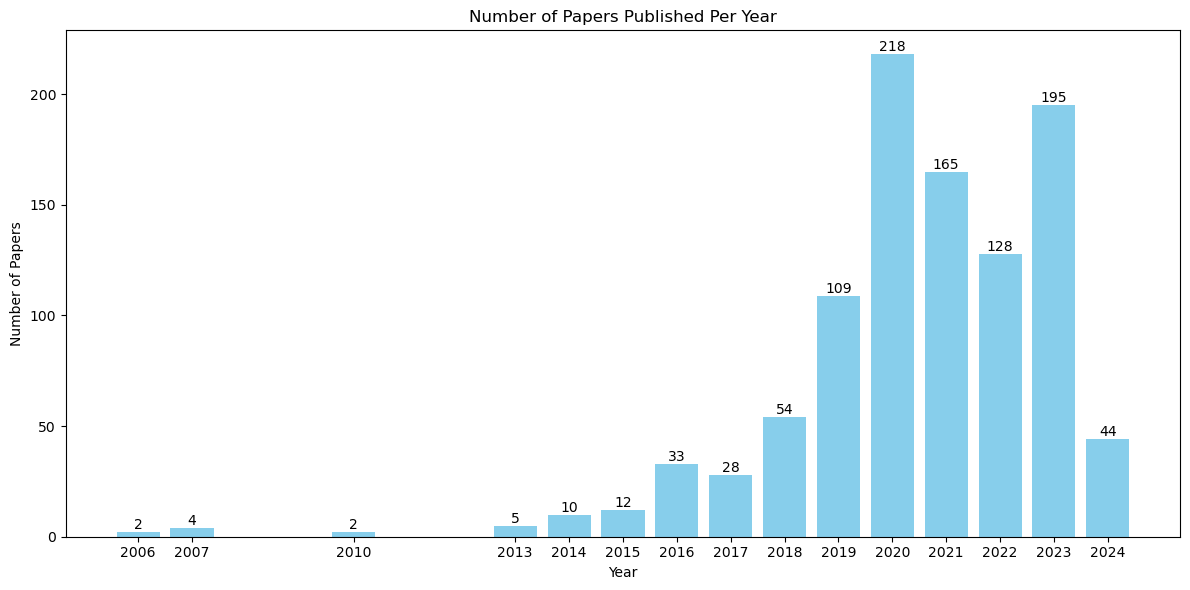

In [41]:
import matplotlib.pyplot as plt

# Ensure year data is in integer format
merged_df['releasedDateY_i'] = merged_df['releasedDateY_i'].astype(int)

# Count the number of occurrences of each year
yearly_counts = merged_df['releasedDateY_i'].value_counts().sort_index()

# Plotting the results
plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

# Annotate each bar with the count above it
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Number of Papers Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(yearly_counts.index, [int(x) for x in yearly_counts.index])  # Set x-ticks directly as integers

# Remove grid lines
plt.grid(False)

plt.tight_layout()
plt.show()


In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming merged_df is already defined and has the necessary columns
gender_counts = merged_df.groupby(['releasedDateY_i', 'First_Gender']).size().unstack(fill_value=0)

# Color mapping for genders
colors = {
    'female': '#B40426',
    'mostly_male': '#89ACFD',
    'mostly_female': '#F39577',
    'male': '#3B4CC0',
    'neutral': '#E1DAE6'
}

# Calculate mean number of authors per year
def calculate_mean_authors_per_year(df, gender_list):
    filtered_df = df[df['First_Gender'].isin(gender_list)]
    filtered_df['Total_Authors'] = filtered_df['Gender_Counts'].apply(sum)
    return filtered_df.groupby('releasedDateY_i')['Total_Authors'].mean()

mean_male_authors_per_year = calculate_mean_authors_per_year(merged_df, ['male', 'mostly_male'])
mean_female_authors_per_year = calculate_mean_authors_per_year(merged_df, ['female', 'mostly_female'])
mean_all_authors_per_year = merged_df.copy()
mean_all_authors_per_year['Total_Authors'] = mean_all_authors_per_year['Gender_Counts'].apply(sum)
mean_all_authors_per_year = mean_all_authors_per_year.groupby('releasedDateY_i')['Total_Authors'].mean()

# Set figure size
plt.figure(figsize=(12, 8))

# Position of the bars on the x-axis
r = list(range(len(gender_counts.index)))
width = 0.8

# Plot bars
bottom_values = np.zeros(len(gender_counts.index))
for gender in gender_counts.columns:
    bars = plt.bar(r, gender_counts[gender], bottom=bottom_values, color=colors.get(gender, '#333333'), edgecolor='grey', width=width, label=gender)
    for i, count in enumerate(gender_counts[gender]):
        if count > 5:  # Only label bars that are big enough
            plt.text(
                i,
                bottom_values[i] + count / 2,
                str(count),
                ha='center',
                va='center',
                color='white',
                fontsize=8,
                fontweight='bold'
            )
    bottom_values += gender_counts[gender]

# Adding vertical mean lines per year
for year in gender_counts.index:
    if year in mean_male_authors_per_year.index:
        plt.axvline(r[year - gender_counts.index[0]], color='blue', linestyle='--', linewidth=1, label='Mean Male/Mostly Male' if year == gender_counts.index[0] else "")
    if year in mean_female_authors_per_year.index:
        plt.axvline(r[year - gender_counts.index[0]], color='red', linestyle='--', linewidth=1, label='Mean Female/Mostly Female' if year == gender_counts.index[0] else "")
    if year in mean_all_authors_per_year.index:
        plt.axvline(r[year - gender_counts.index[0]], color='green', linestyle='--', linewidth=1, label='Mean All Authors' if year == gender_counts.index[0] else "")

# Add labels
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Counts by Gender per Year')
plt.xticks(r, gender_counts.index, rotation=45)

# Adding legend
plt.legend()

# Show the plot
plt.show()


TypeError: unsupported operand type(s) for +: 'int' and 'str'

C:\Users\maria\AppData\Local\Temp\ipykernel_6428\1975766355.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Gender_Counts'] = merged_df['Gender_Counts'].apply(clean_gender_counts)
C:\Users\maria\AppData\Local\Temp\ipykernel_6428\1975766355.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Total_Authors'] = filtered_df['Gender_Counts'].apply(lambda x: sum(x.values()) if isinstance(x, dict) else sum(x))
C:\Users\maria\AppData\Local\Temp\ipykernel_6428\1975766355.py:23: SettingW

KeyError: 4

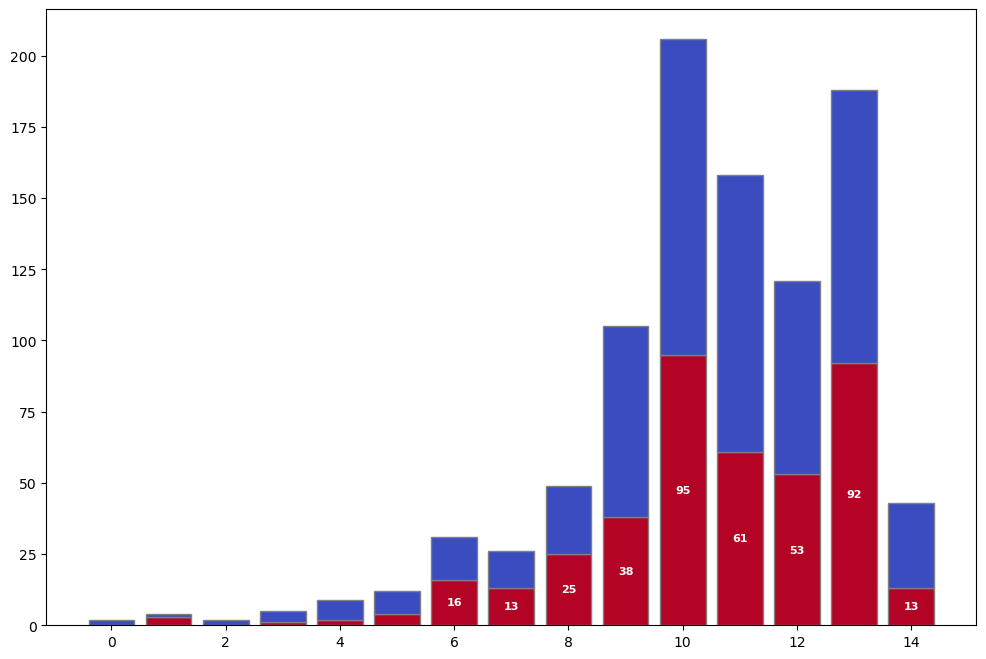

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming merged_df is already defined and loaded

# Ensure that Gender_Counts column contains the correct data types
def clean_gender_counts(gender_counts):
    if isinstance(gender_counts, str):
        # Attempt to evaluate strings to Python objects (e.g., from string representation of lists/dicts)
        try:
            gender_counts = eval(gender_counts)
        except:
            pass
    return gender_counts

# Apply the cleaning function to the Gender_Counts column
merged_df['Gender_Counts'] = merged_df['Gender_Counts'].apply(clean_gender_counts)

# Calculate mean number of authors per year
def calculate_mean_authors_per_year(df, gender_list):
    filtered_df = df[df['First_Gender'].isin(gender_list)]
    filtered_df['Total_Authors'] = filtered_df['Gender_Counts'].apply(lambda x: sum(x.values()) if isinstance(x, dict) else sum(x))
    return filtered_df.groupby('releasedDateY_i')['Total_Authors'].mean()

mean_male_authors_per_year = calculate_mean_authors_per_year(merged_df, ['male', 'mostly_male'])
mean_female_authors_per_year = calculate_mean_authors_per_year(merged_df, ['female', 'mostly_female'])
mean_all_authors_per_year = merged_df.copy()
mean_all_authors_per_year['Total_Authors'] = mean_all_authors_per_year['Gender_Counts'].apply(lambda x: sum(x.values()) if isinstance(x, dict) else sum(x))
mean_all_authors_per_year = mean_all_authors_per_year.groupby('releasedDateY_i')['Total_Authors'].mean()

# Assuming merged_df is already defined and has the necessary columns
gender_counts = merged_df.groupby(['releasedDateY_i', 'First_Gender']).size().unstack(fill_value=0)

# Color mapping for genders
colors = {
    'female': '#B40426',
    'mostly_male': '#89ACFD',
    'mostly_female': '#F39577',
    'male': '#3B4CC0',
    'neutral': '#E1DAE6'
}

# Set figure size
plt.figure(figsize=(12, 8))

# Position of the bars on the x-axis
r = np.arange(len(gender_counts.index))
width = 0.8

# Plot bars
bottom_values = np.zeros(len(gender_counts.index))
for gender in gender_counts.columns:
    bars = plt.bar(r, gender_counts[gender], bottom=bottom_values, color=colors.get(gender, '#333333'), edgecolor='grey', width=width, label=gender)
    for i, count in enumerate(gender_counts[gender]):
        if count > 5:  # Only label bars that are big enough
            plt.text(
                r[i],
                bottom_values[i] + count / 2,
                str(count),
                ha='center',
                va='center',
                color='white',
                fontsize=8,
                fontweight='bold'
            )
    bottom_values += gender_counts[gender]

# Adding vertical mean lines per year
for year in gender_counts.index:
    idx = np.where(gender_counts.index == year)[0][0]
    if year in mean_male_authors_per_year.index:
        plt.axvline(r[idx], color='blue', linestyle='--', linewidth=1, label='Mean Male/Mostly Male' if year == gender_counts.index[0] else "")
    if year in mean_female_authors_per_year.index:
        plt.axvline(r[idx], color='red', linestyle='--', linewidth=1, label='Mean Female/Mostly Female' if year == gender_counts.index[0] else "")
    if year in mean_all_authors_per_year.index:
        plt.axvline(r[idx], color='green', linestyle='--', linewidth=1, label='Mean All Authors' if year == gender_counts.index[0] else "")

# Add labels
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Counts by Gender per Year')
plt.xticks(r, gender_counts.index, rotation=45)

# Adding legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_df is already defined and has the necessary columns
gender_counts = merged_df.groupby(['releasedDateY_i', 'First_Gender']).size().unstack(fill_value=0)

# Color mapping for genders
colors = {
    'female': '#B40426',
    'mostly_male': '#89ACFD',
    'mostly_female': '#F39577',
    'male': '#3B4CC0',
    'neutral': '#E1DAE6'
}

# Set figure size
plt.figure(figsize=(12, 8))

# Position of the bars on the x-axis
r = list(range(len(gender_counts.index)))
width = 0.15

# Plot bars
for i, gender in enumerate(gender_counts.columns):
    plt.bar([x + width*i for x in r], gender_counts[gender], width=width, label=gender, color=colors.get(gender, '#333333'))

# Add labels
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Counts by Gender per Year')
plt.xticks([r + width*(len(gender_counts.columns)/2) for r in range(len(gender_counts.index))], gender_counts.index)

# Adding legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Group data by year and gender and count occurrences
gender_counts = merged_df.groupby(['releasedDateY_i', 'First_Gender']).size().unstack(fill_value=0)

# Calculate the percentage of each gender per year
gender_percentages = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
gender_counts

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict

def calculate_temporal_variables(year_column, item_column, value_column):
    # Collect all unique items from the item_column
    all_items = set()
    for counter in item_column:
        all_items.update(counter.keys())

    # Initialize a dictionary to store data
    data = {item: defaultdict(list) for item in all_items}

    # Populate the dictionary with values
    for year, counter, value in zip(year_column, item_column, value_column):
        for item in counter:
            # Append the value for each count of the item in that year
            data[item][year].extend([value] * counter[item])

    # Convert the dictionary into a DataFrame where each cell is a list of values
    temporal_item = pd.DataFrame({k: pd.Series(v) for k, v in data.items()})
    temporal_item = temporal_item.applymap(lambda x: x if isinstance(x, list) else [])

    # Merge lists of values across rows and columns instead of calculating their averages
    temporal_item['year_gender_score'] = temporal_item.apply(lambda row: [val for sublist in row for val in sublist if isinstance(sublist, list)], axis=1)
    temporal_item.loc['topic_gender_score'] = temporal_item.apply(lambda col: [val for sublist in col for val in sublist if isinstance(sublist, list)], axis=0)

    return temporal_item


# Calculate the temporal dataframe
temporal_df = calculate_temporal_variables(merged_df['releasedDateY_i'], merged_df['Parsed_BERTopics'], merged_df['First_Gender_Value'])

temporal_bertopic_values = temporal_df.applymap(lambda x: np.mean(x) if x else np.nan)
temporal_bertopic_values

In [ ]:
temporal_df

In [ ]:
 # Convert each value in the dictionary from float to int
lda_values = merged_df['Parsed_TopicsLDA'].apply(
    lambda d: {key: int(value) for key, value in d.items()}
)

# Assuming 'year_column', 'item_column', and 'value_column' are columns in your DataFrame, 'merged_df'
temporal_df = calculate_temporal_variables(merged_df['releasedDateY_i'], lda_values, merged_df['First_Gender_Value'])
# Calculate the average of the lists in the temporal_df
temporal_lda_values = temporal_df.applymap(lambda x: np.mean(x) if x else np.nan)

temporal_lda_values

In [ ]:

# Assuming 'year_column', 'item_column', and 'value_column' are columns in your DataFrame, 'merged_df'
temporal_entities_df = calculate_temporal_variables(merged_df['releasedDateY_i'], merged_df['TaxoEntities_Count'], merged_df['First_Gender_Value'])
# Calculate the average of the lists in the temporal_df
temporal_entities_values = temporal_df.applymap(lambda x: np.mean(x) if x else np.nan)

temporal_entities_values

In [ ]:
temporal_entities_df

In [ ]:
!pip show pandas  # Check the installed version


## Save dataframe

Save the dataframe we will use to create the graph

In [54]:
merged_df.columns.to_list()

['title_s',
 'journalTitle_s',
 'authLastName_s',
 'authFullName_s',
 'abstract_s',
 'fileMain_s',
 'ePublicationDateY_i',
 'Complete',
 'Genders',
 'unknownGenders',
 'content_text',
 'cleaned_content_text',
 'contentLen',
 'chunks',
 'numChunks',
 'Chunks_BERTopics',
 'TopicsLDA',
 'TaxoEntitiesMD2_GBIF',
 'releasedDateY_i',
 'Parsed_TopicsLDA',
 'Parsed_BERTopics',
 'Gender_Counts',
 'Gender_Numeric_Avg',
 'First_Gender',
 'First_Gender_Value',
 'Last_Gender',
 'Last_Gender_Value',
 'TaxoEntities_Count',
 'Num_Unique_Entities',
 'Entity_Buckets']

In [56]:
graph_data = merged_df[['title_s', 'journalTitle_s', 'fileMain_s', 'releasedDateY_i', 'Gender_Numeric_Avg', 'First_Gender_Value', 'Last_Gender_Value', 'numChunks', 'Parsed_BERTopics', 'Parsed_TopicsLDA',  'TaxoEntities_Count']]
graph_data

,title_s,journalTitle_s,fileMain_s,releasedDateY_i,Gender_Numeric_Avg,First_Gender_Value,Last_Gender_Value,numChunks,Parsed_BERTopics,Parsed_TopicsLDA,TaxoEntities_Count
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,https://hal.inrae.fr/hal-03461601/document,2022,0.000000,1.0,0.0,12,"{'B0': 1, 'B124': 7, 'B-1': 4}","{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{('GBIF:3183002', 'clove'): 11, ('GBIF:3183002..."
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,https://hal.science/hal-03829927/document,2024,-0.208333,-1.0,-0.5,12,"{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}","{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{('GBIF:9065640', 'Tyto novaehollandiae novaeh..."
2,['An ecological theory of changing human popul...,People and Nature,https://hal.science/hal-02350603/document,2019,0.000000,1.0,-1.0,12,"{'B-1': 1, 'B177': 11}","{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...",{}
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,https://shs.hal.science/halshs-02937670/document,2022,1.000000,1.0,1.0,16,"{'B0': 1, 'B4': 11, 'B-1': 4}","{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{('GBIF:5786457', 'Sateré Marmoset'): 3, ('GBI..."
4,['From biodiversity to health: Quantifying the...,People and Nature,https://cnam.hal.science/hal-04080723/document,2023,0.000000,-1.0,-1.0,14,"{'B-1': 11, 'B45': 2, 'B53': 1}","{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{('GBIF:4494312', 'Spilomena beata Blüthgen'):..."
...,...,...,...,...,...,...,...,...,...,...,...
1134,['Unidirectional response to bidirectional sel...,Ecology and Evolution,https://hal.sorbonne-universite.fr/hal-0295053...,2020,-0.250000,1.0,-1.0,14,"{'B0': 1, 'B32': 5, 'B-1': 7, 'B91': 1}","{'L1': 1.07, 'L13': 5.18, 'L19': 1.3, 'L27': 3...","{('GBIF:2368377', 'Oryzias latipes'): 2, ('GBI..."
1135,"['Think globally, measure locally: The MIREN s...",Ecology and Evolution,https://u-picardie.hal.science/hal-03619105/do...,2022,-0.103448,1.0,-1.0,20,"{'B0': 1, 'B90': 1, 'B-1': 9, 'B138': 1, 'B78'...","{'L10': 5.66, 'L17': 49.84, 'L21': 2.5, 'L90':...","{('GBIF:4667268', 'Agustina'): 2, ('GBIF:85988..."
1136,['Adaptation and plasticity in aboveground all...,Ecology and Evolution,https://hal.inrae.fr/hal-02636091/document,2020,-0.200000,1.0,-1.0,9,{'B-1': 9},"{'L98': 2.78, 'L129': 9.94, 'L137': 1.56, 'L19...","{('GBIF:2438660', 'European Pine Vole'): 1, ('..."
1137,['Foraging and mating behaviors of Hypsignathu...,Ecology and Evolution,https://hal.science/hal-04167917/document,2023,-0.230769,1.0,-1.0,12,"{'B0': 1, 'B20': 9, 'B57': 1, 'B27': 1}","{'L7': 4.9, 'L45': 59.89, 'L49': 8.88, 'L79': ...","{('GBIF:2432958', 'Hypsignathus monstrosus'): ..."


In [57]:
merged_df.to_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/graph_papers_full.csv', index=False, encoding='utf-8' )
graph_data.to_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/graph_papers_basic.csv', index=False, encoding='utf-8' )

## Creating the Entity Node dataset

In [ ]:
entities_nodes_df = pd.read_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/entities_GBIF.csv', encoding='utf-8')
entities_nodes_df

# Networks Construction
## Entity-Entity

In [ ]:
#----FUNCTIONS USED

#------Functions to build graphs
def build_graph_entities(df, min_count_threshold=3, min_occurence_threshold = 0, min_edge_weight=0):
    # Filter entities per row and prepare data for graph nodes and edges
    entity_counts = Counter()
    entity_gender_values = defaultdict(list)
    entity_gender_values_team = defaultdict(list)
    entity_documents = defaultdict(list)
    entity_year_occurrences = defaultdict(lambda: defaultdict(int))  # Defaultdict for tracking per-year occurrences

    
    total_rows = len(df)
    
    # Filter out entities below the threshold per row
    df['Filtered_Entities'] = df['TaxoEntities_Count'].apply(lambda x: {k: v for k, v in x.items() if v >= min_count_threshold})
    
    # Calculate total counts and average gender values for each entity
    for index, row in df.iterrows():
        entities = row['Filtered_Entities']
        entity_counts.update(entities)
        
        for entity in entities:
            entity_gender_values[entity].append(row['First_Gender_Value'])
            entity_gender_values_team[entity].append(row['Gender_Numeric_Avg'])
            entity_documents[entity].append(index)
            entity_year_occurrences[entity][row['releasedDateY_i']] += 1
        
    # Reconstruct the filtered_entities dictionary including only entities above the threshold
    filtered_entities = {e: cnt for e, cnt in entity_counts.items() if cnt >= min_occurence_threshold}

    # Convert the dictionary to a list of tuples (entity, count) and sort by count
    sorted_entities = sorted(filtered_entities.items(), key=lambda item: item[1])

    # Print entities sorted by count
    for entity, count in sorted_entities:
        print(f"{entity}: {count}")
        
        
    
    # Calculate average gender values
    entity_avg_gender = {entity: np.mean(values) for entity, values in entity_gender_values.items() if entity in entity_counts}
    entity_avg_gender_team = {entity: np.mean(values) for entity, values in entity_gender_values_team.items() if entity in entity_counts}

    # Create the graph
    G = nx.Graph()
    
    # Add nodes with size, color, and border color attributes
    for entity, count in entity_counts.items():
        if entity in filtered_entities:  # Only add entities that meet the overall count threshold
            avg_gender_value = entity_avg_gender.get(entity, 0)
            avg_gender_team_value = entity_avg_gender_team.get(entity, 0)
            
            # Calculate weighted gender scores
            #weighted_gender_score = (count / total_rows) * avg_gender_value
            #weighted_gender_score_team = (count / total_rows) * avg_gender_team_value
            
            color = plt.cm.coolwarm((avg_gender_value + 1) / 2)
            border_color = plt.cm.coolwarm((avg_gender_team_value + 1) / 2)
            
            
            # Document count and list of documents using index
            document_list = entity_documents[entity]
            document_count = len(document_list)
            size=document_count
            
            # Add node with all attributes
            G.add_node(entity, size=document_count, total_count=count, color=color, border_color=border_color,
                       avg_gender=avg_gender_value, avg_gender_team=avg_gender_team_value,
                       #weighted_gender_score=weighted_gender_score,
                       #weighted_gender_score_team=weighted_gender_score_team,
                       documents=document_list, document_count=document_count, year_occurrences=dict(entity_year_occurrences[entity]))


    # Connect nodes with edges
    for index, row in df.iterrows():
        entities = row['Filtered_Entities']
        for entity_a in entities:
            for entity_b in entities:
                if entity_a != entity_b:
                    if G.has_edge(entity_a, entity_b):
                        G[entity_a][entity_b]['weight'] += 1
                    else:
                        G.add_edge(entity_a, entity_b, weight=1)
    
    
    
    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)

    
    # Plot the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.1, iterations=20)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=[data['size'] for _, data in G.nodes(data=True)],
                           node_color=[data['color'] for _, data in G.nodes(data=True)],
                           edgecolors=[data['border_color'] for _, data in G.nodes(data=True)], linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.5)
    
    plt.title("Graph Visualization")
    plt.axis('off')
    plt.show()
    
    return G, stats_df

#-----Functions to calculate meassures
def calculate_clustering_measures_communities(original_graph, input_communities_or_subgraphs):
    
    data_for_df = []
    total_edges = original_graph.number_of_edges()
    total_nodes = original_graph.number_of_nodes()

    # Determine if input is a list of communities or a dictionary of subgraphs
    if isinstance(input_communities_or_subgraphs, list):
        community_list = input_communities_or_subgraphs
        use_as_communities = True
    elif isinstance(input_communities_or_subgraphs, dict):
        community_list = list(input_communities_or_subgraphs.values())
        use_as_communities = False
    else:
        raise ValueError("Input must be either a list of communities or a dictionary with node lists")

    for i, nodes in enumerate(community_list):
        subgraph = original_graph.subgraph(nodes)
        num_nodes = subgraph.number_of_nodes()
        internal_edges = subgraph.number_of_edges()
        external_edges = sum(1 for u, v in original_graph.edges() if (u in subgraph and v not in subgraph) or (u not in subgraph and v in subgraph))

        internal_density = (2 * internal_edges) / (num_nodes * (num_nodes - 1)) if num_nodes > 1 else 0
        possible_external_links = num_nodes * (total_nodes - num_nodes)
        external_density = external_edges / possible_external_links if possible_external_links > 0 else 0
        community_modularity = modularity(original_graph, [nodes] if use_as_communities else [set(subgraph.nodes()), set(original_graph.nodes()) - set(subgraph.nodes())])
        conductance = external_edges / (internal_edges + external_edges) if (internal_edges + external_edges) > 0 else 0
        clustering_coefficient = nx.average_clustering(subgraph)

        data_for_df.append({
            'Number of Nodes': num_nodes,
            'Number of Edges': internal_edges,
            'Internal Density': internal_density,
            'External Density': external_density,
            'Graph Cut': external_edges,
            'Modularity Score': community_modularity,
            'Conductance': conductance,
            'Clustering Coefficient': clustering_coefficient
        })

    df = pd.DataFrame(data_for_df)
    clustering_meassures_summary = df.describe().drop(['count', '25%', '50%', '75%', 'std'])  # simplified statistical summary
    clustering_meassures = data_for_df
    return clustering_meassures, clustering_meassures_summary

def get_subgraphs_clustering_measures(original_graph, subgraph):
    from scipy.stats import mode
    ''' Function to display clustering measures values of communities or subgraphs'''
    results = {}
    data_for_df = []
    total_edges = original_graph.number_of_edges()
    total_nodes = original_graph.number_of_nodes()

    if isinstance(subgraph, list):
        community_list = subgraph
        use_as_communities = True
    elif isinstance(subgraph, dict):
        community_list = list(subgraph.values())
        use_as_communities = False
    else:
        raise ValueError("Input must be either a list of communities or a dictionary with node lists")

    for i, nodes in enumerate(community_list):
        subgraph = original_graph.subgraph(nodes)
        num_nodes = subgraph.number_of_nodes()
        internal_edges = subgraph.number_of_edges()
        external_edges = sum(1 for u, v in original_graph.edges() if (u in subgraph and v not in subgraph) or (u not in subgraph and v in subgraph))

        # Calculations for each community or subgraph
        internal_density = (2 * internal_edges) / (num_nodes * (num_nodes - 1)) if num_nodes > 1 else 0
        possible_external_links = num_nodes * (total_nodes - num_nodes)
        external_density = external_edges / possible_external_links if possible_external_links > 0 else 0

        if use_as_communities:
            community_modularity = modularity(original_graph, subgraph)
        else:
            rest_of_graph_nodes = set(original_graph.nodes()) - set(subgraph.nodes())
            community_modularity = modularity(original_graph, [set(subgraph.nodes()), rest_of_graph_nodes])
        conductance = external_edges / (internal_edges + external_edges) if (internal_edges + external_edges) > 0 else 0

        clustering_coefficient = nx.average_clustering(subgraph)

        data_for_df.append({
            'Number of Nodes': num_nodes,
            'Number of Edges': internal_edges,
            'Internal Density': internal_density,
            'External Density': external_density,
            'Graph Cut': external_edges,
            'Modularity Score': community_modularity,
            'Conductance': conductance,
            'Clustering Coefficient': clustering_coefficient
        })
        
        results[f'Subgraph {i}'] = data_for_df[-1]

    # DataFrame handling
    df = pd.DataFrame(data_for_df)
    numeric_df = df.select_dtypes(include=[np.number])
    summary_df = numeric_df.agg(['mean', 'max', 'min']).assign(
        Mode=lambda x: x.apply(lambda col: mode(col)[0][0] if len(mode(col)[0]) > 0 else None)
    )
    
    print(f'Subgraph clustering meassures {summary_df}')

    return results, summary_df


def calculate_centrality_measures(graph, name_complement=''):
    # Calculate Degree Centrality
    degree_centrality = nx.degree_centrality(graph)
    
    # Calculate Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(graph)
    
    # Calculate Closeness Centrality
    closeness_centrality = nx.closeness_centrality(graph)
    
    # Calculate Eigenvector Centrality
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)
    
    # Calculate neighborhood connectivity
    neighborhood_connectivity = {}
    male_neighbors = {}
    female_neighbors = {}
    neutral_neighbors = {}
    
    for node in graph.nodes():
        neighbors = list(graph.neighbors(node))
        neighbor_degrees = [graph.degree(neighbor) for neighbor in neighbors]
        
        # Neighborhood Connectivity
        if neighbors:  # avoid division by zero
            neighborhood_connectivity[node] = sum(neighbor_degrees) / len(neighbor_degrees)
        else:
            neighborhood_connectivity[node] = 0

        # Calculate the percentage of male, female, and neutral neighbors
        male_count = sum(1 for n in neighbors if graph.nodes[n].get('avg_gender', 0) <= -0.5)
        female_count = sum(1 for n in neighbors if graph.nodes[n].get('avg_gender', 0) >= 0.5)
        neutral_count = sum(1 for n in neighbors if -0.5 < graph.nodes[n].get('avg_gender', 0) < 0.5)
        
        total_neighbors = len(neighbors) if neighbors else 1  # avoid division by zero
        
        male_neighbors[node] = male_count / total_neighbors
        female_neighbors[node] = female_count / total_neighbors
        neutral_neighbors[node] = neutral_count / total_neighbors
    
    # Add centrality measures and neighbor percentages as node attributes
    nx.set_node_attributes(graph, degree_centrality, f'{name_complement}degree_centrality')
    nx.set_node_attributes(graph, betweenness_centrality, f'{name_complement}betweenness_centrality')
    nx.set_node_attributes(graph, closeness_centrality, f'{name_complement}closeness_centrality')
    nx.set_node_attributes(graph, eigenvector_centrality, f'{name_complement}eigenvector_centrality')
    nx.set_node_attributes(graph, neighborhood_connectivity, f'{name_complement}neighborhood_connectivity')
    nx.set_node_attributes(graph, male_neighbors, f'{name_complement}male_neighbors')
    nx.set_node_attributes(graph, female_neighbors, f'{name_complement}female_neighbors')
    nx.set_node_attributes(graph, neutral_neighbors, f'{name_complement}neutral_neighbors')

    print("Centrality measures and neighborhood attributes added to nodes.")
    return graph





def explore_graph(graph):
    ''' Function to display centrality values, correlations of node attributes, and plot a heatmap.'''
    from scipy.stats import mode, pearsonr

   
    # Prepare a dictionary to store the attribute data
    attributes_data = {}

    print(f"Total number of nodes: {graph.number_of_nodes()}")
    print(f"Total number of edges: {graph.number_of_edges()}")

    # Collect data for each node in the graph
    for node, data in graph.nodes(data=True):
        for attr, value in data.items():
            # Check if the value is numeric; if not, print a warning and the offending data
            if isinstance(value, (int, float, np.number)):
                if attr not in attributes_data:
                    attributes_data[attr] = []
                attributes_data[attr].append(value)
            #else:
                #print(f"Non-numeric data detected: Node {node}, Attribute {attr}, Value {value}")
    #print(f"Attributes data1: {attributes_data}")
    # Ensure all attributes are numeric for centrality measures
    if 'degree_centrality' not in attributes_data:
        attributes_data['degree_centrality'] = list(nx.degree_centrality(graph).values())
    if 'betweenness_centrality' not in attributes_data:
        attributes_data['betweenness_centrality'] = list(nx.betweenness_centrality(graph).values())
    if 'closeness_centrality' not in attributes_data:
        attributes_data['closeness_centrality'] = list(nx.closeness_centrality(graph).values())

    # Convert attributes_data to DataFrame for easier manipulation
    attribute_df = pd.DataFrame(attributes_data)
    
    #print(f"Attributes data2: {attribute_df}")

    # Calculate statistical measures for each attribute
    stats_data = {}
    for attr, values in attribute_df.items():
        stats_data[attr] = {
            'Max': np.max(values),
            'Min': np.min(values),
            'Average': np.mean(values),
            'Mode': mode(values).mode[0] if len(mode(values).mode) > 0 else None
        }

    # Convert the stats data into a DataFrame
    stats_df = pd.DataFrame(stats_data).transpose()
    stats_df.columns = ['Max', 'Min', 'Average', 'Mode']

    # Calculate the correlation matrix
    correlation_matrix = attribute_df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Attribute Correlation Heatmap')
    plt.show()

    return stats_df, correlation_matrix




import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_communities, girvan_newman, k_clique_communities
import itertools
import time


def detect_communities(G, method='louvain', community_parameter=3, graph_name='Entities'):
    '''
    Detect communities in a graph using specified method and update node attributes with their community membership.

    Args:
    G (Graph): A NetworkX graph.
    method (str): Method for community detection ('louvain', 'girvan_newman', 'k_clique').
    community_parameter (int): Parameter specific to the method:
        - For 'k_clique', it's the size of the smallest clique.
        - For 'girvan_newman', it's the number of splits.

    Returns:
    dict: A dictionary of communities with keys as community labels and values as lists of nodes.
    '''
    # Clear existing community data for this method
    nx.set_node_attributes(G, {method: []}, method)  # Resets the attribute for all nodes
    
    # Remove isolated nodes from the graph and print the count of removed nodes
    isolated_nodes = list(nx.isolates(G))
    num_isolated = len(isolated_nodes)
    G.remove_nodes_from(isolated_nodes)
    print(f"Removed {num_isolated} isolated nodes from the graph.")
    
    # Print the remaining number of nodes
    num_remaining_nodes = G.number_of_nodes()
    print(f"Remaining nodes in the graph: {num_remaining_nodes}")


    # Proceed with community detection
    start_time = time.time()  # Start timing

    if method == 'louvain':
        communities = louvain_communities(G)
    elif method == 'girvan_newman':
        comp = girvan_newman(G)
        limited = itertools.islice(comp, community_parameter - 1)
        for communities in limited:
            pass
        communities = list(sorted(c) for c in communities)
    elif method == 'k_clique':
        communities = list(k_clique_communities(G, community_parameter))
        communities = [list(community) for community in communities]
    else:
        raise ValueError("Unsupported community detection method")

    # Timing the community detection
    elapsed_time = time.time() - start_time
    print(f"Community detection {method} took {elapsed_time:.2f} seconds.")
    
    community_nodes = {f"Community {i}": community for i, community in enumerate(communities)}

    # Annotate nodes with their communities
    for community_id, nodes in community_nodes.items():
        for node in nodes:
            if G.nodes[node].get(method):
                G.nodes[node][method] = [community_id]  # Replace with new community ID
            else:
                G.nodes[node][method] = [community_id]  # Initialize if not present

                
                
    
    # Detect communities and obtain the list of community sizes
    community_sizes = [len(community) for community in communities]
    average_size = np.mean(community_sizes)
    above_average = f'>={average_size:.1f}'  # Label for communities above the average

    # Group community sizes
    size_counts = Counter(community_sizes)
    grouped_sizes = {size: count for size, count in size_counts.items() if size < average_size}
    grouped_sizes[above_average] = sum(count for size, count in size_counts.items() if size >= average_size)

    # Sorting keys and separate special label for above average
    sorted_keys = sorted([key for key in grouped_sizes.keys() if isinstance(key, int)])
    numeric_keys = list(range(len(sorted_keys) + 1))  # Numeric positions for the bars
    sorted_values = [grouped_sizes[key] for key in sorted_keys] + [grouped_sizes[above_average]]

    # Assign colors, with a special color for the '>average' bar
    colors = ['skyblue' if key < average_size else 'navy' for key in sorted_keys] + ['navy']

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(numeric_keys, sorted_values, color=colors)
    plt.xticks(numeric_keys, labels=sorted_keys + [above_average])  # Set the labels at the assigned numeric positions
    plt.title(f'Distribution of Community Sizes for {graph_name} [{method}]')
    plt.xlabel('Community Size')
    plt.ylabel('Count')
    plt.show()
    
    
    
    
    
    

    
    # Create a color map for the communities
    community_colors = plt.get_cmap('viridis', len(communities))
    
    # Plot the graph with community coloring
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.1, iterations=20)
    
    # Draw nodes with colors based on their community
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(
            G, pos, 
            nodelist=community, 
            node_color=[community_colors(i)]*len(community), 
            node_size=[G.nodes[node].get('size', 10) * 10 for node in community],
            alpha=0.7
        )
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    plt.title("Graph with Detected Communities")
    plt.axis('off')
    plt.show()
    
    plot_all_community_stats(G, community_nodes,  title_g=f'{graph_name} [{method}]')
    community_clustering_meassures, clustering_meassures_summary = calculate_clustering_measures_communities(G, community_nodes)
    
    print(f"Method {method} - Found {len(community_nodes)} communities: {community_nodes}")
    
    return community_nodes, community_clustering_meassures, clustering_meassures_summary, elapsed_time



def analyze_multiple_community_methods(G, min_clique=3, gn_splits=3, graph_name='Entities'):
    '''
    Apply multiple community detection methods on a graph and compile their results.
    
    Args:
    G (Graph): A NetworkX graph.
    min_clique (int): Minimum size of the clique for the k-clique community detection.
    gn_splits (int): Number of splits for the Girvan-Newman method.
    graph_name (str): Name of the graph for titling purposes.

    Returns:
    Three dictionaries: 
    - dict of community nodes keyed by method,
    - dict of community clustering measures keyed by method,
    - dict of clustering measures summaries keyed by method.
    '''
    
    methods = ['louvain', 'girvan_newman', 'k_clique']
    times = []
    community_nodes_dict = {}
    community_clustering_measures_dict = {}
    clustering_measures_summary_dict = {}

    for method in methods:
        community_parameter = min_clique if method != 'girvan_newman' else gn_splits
        community_nodes, community_clustering_measures, clustering_measures_summary, elapsed_time  = detect_communities(
            G, method, community_parameter, graph_name=graph_name
        )
        times.append(elapsed_time)
        
        print(f'testing {community_clustering_measures}')
        community_nodes_dict[method] = community_nodes
        community_clustering_measures_dict[method] = community_clustering_measures
        clustering_measures_summary_dict[method] = clustering_measures_summary
        
        
    # Plot the benchmark times after all methods are processed
    plt.figure(figsize=(8, 4))
    plt.bar(methods, times, color='skyblue')
    plt.xlabel('Community Detection Method')
    plt.ylabel('Time in seconds')
    plt.title(f'Execution Time Comparison for {graph_name}')
    plt.ylim(0, max(times) * 1.1)  # Increase ylim for better visual
    # Annotate each bar with the corresponding execution time
    for bar, time in zip(bars, times):
        plt.text(bar.get_x() + bar.get_width() / 2, time, f'{time:.2f}s', ha='center', va='bottom')

    plt.show()

    return community_nodes_dict, community_clustering_measures_dict, clustering_measures_summary_dict



#-----Functions to build graphs/subgraphs/communities

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np  # Necessary for calculations



def split_graph_by_gender(graph):
    subgraphs = {
        'men': nx.Graph(),
        'neutral': nx.Graph(),
        'women': nx.Graph()
    }
    
    # Add nodes with attributes based on gender
    for node, data in graph.nodes(data=True):
        avg_gender = data.get('avg_gender', 0)  # Default to 0 if not available
        target_subgraph = subgraphs['neutral']
        if avg_gender <= -0.5:
            target_subgraph = subgraphs['men']
        elif avg_gender >= 0.5:
            target_subgraph = subgraphs['women']
        target_subgraph.add_node(node, **data)
    
    # Add edges within each subgraph based on the original graph's edges
    for u, v, data in graph.edges(data=True):
        if u in subgraphs['men'] and v in subgraphs['men']:
            subgraphs['men'].add_edge(u, v, **data)
        elif u in subgraphs['neutral'] and v in subgraphs['neutral']:
            subgraphs['neutral'].add_edge(u, v, **data)
        elif u in subgraphs['women'] and v in subgraphs['women']:
            subgraphs['women'].add_edge(u, v, **data)
            
            
    # Dictionaries to hold the output
    subgraph_dict = {}
    stats_dict = {}
    correlation_matrix_dict = {}
    
    for gender, subgraph in subgraphs.items():
        subgraph = calculate_centrality_measures(subgraph, name_complement=f"{gender}_")
        plot_graph_with_attributes(subgraph, title=f"Graph Visualization for {gender.capitalize()}", top_labels=20)
        stats, correlation_matrix = explore_graph(subgraph)
        
        subgraph_dict[gender] = subgraph
        stats_dict[gender] = stats
        correlation_matrix_dict[gender] = correlation_matrix
    
    return subgraph_dict, stats_dict#, correlation_matrix_dict



#-----Functions for information display

def print_node_attributes(graph, node_name):
    # Check if the node exists in the graph
    if node_name in graph:
        # Retrieve and print all attributes of the node
        node_attributes = graph.nodes[node_name]
        print(f"Attributes for '{node_name}':")
        for attribute, value in node_attributes.items():
            print(f"  {attribute}: {value}")
    else:
        print(f"No node named '{node_name}' found in the graph.")



def plot_graph_with_attributes(graph, title='Graph Visualization', scale_node=2, top_labels=10, spacing_k = 0.15):
    plt.figure(figsize=(14, 10))  # Increased figure size for better visibility
    pos = nx.spring_layout(graph, k=spacing_k, iterations=50)  # Increased spacing and iterations for a better spread

    # Prepare a plot with an axis
    fig, ax = plt.subplots(figsize=(14, 10))  # Match subplot size to figure size for consistency
    
    # Draw nodes with size and color attributes
    node_sizes = [graph.nodes[node]['size'] * scale_node for node in graph.nodes()]  # Increased size scaling factor
    node_colors = [graph.nodes[node]['color'] for node in graph.nodes()]
    edge_colors = [graph.nodes[node]['border_color'] for node in graph.nodes()]

    # Draw nodes
    nodes = nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color=node_colors, edgecolors=edge_colors, linewidths=2, alpha=0.9, ax=ax)
    
    # Draw edges
    nx.draw_networkx_edges(graph, pos, width=1, alpha=0.4, ax=ax)  # Increased edge width for visibility
    
    # Draw labels for the top n largest nodes
    sorted_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['size'], reverse=True)
    labels = {node[0]: node[0] for node in sorted_nodes[:top_labels]}
    nx.draw_networkx_labels(graph, pos, labels, font_size=10, ax=ax)  # Increased font size for labels
    
    # Create a color bar
    norm = plt.Normalize(vmin=-1, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
    sm.set_array([])  # Necessary when only using colormap and not mappable data
    cbar = plt.colorbar(sm, orientation='horizontal', ax=ax, pad=0.1)
    cbar.set_label('Average Gender Value')

    plt.title(title)
    plt.axis('off')  # Hide the axes
    plt.show()
    
    
    
def plot_top_nodes(graph, attribute_name='size', top_n=20):
    from statistics import mode, StatisticsError
    # Ensure the graph has the specified attribute for nodes
    if not nx.get_node_attributes(graph, attribute_name):
        print(f"No '{attribute_name}' attribute found for nodes in the graph.")
        return

    # Extract attribute values and sort nodes by this attribute
    node_attributes = nx.get_node_attributes(graph, attribute_name)
    
    # Compute statistics for all nodes
    all_sizes = list(node_attributes.values())
    min_size = min(all_sizes)
    max_size = max(all_sizes)
    avg_size = np.mean(all_sizes)
    try:
        mode_size = mode(all_sizes)
    except StatisticsError:
        mode_size = "No unique mode"

    # Print global statistics
    print(f"Global Min size: {min_size}")
    print(f"Global Max size: {max_size}")
    print(f"Global Avg size: {avg_size}")
    print(f"Global Mode size: {mode_size}")
    
    
    top_nodes = sorted(node_attributes.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Print details of top nodes
    print("Top nodes by attribute:", attribute_name)
    for node, value in top_nodes:
        print(f"  {node}: {value}")

    # Create a subgraph of these top nodes
    top_graph = graph.subgraph([node for node, _ in top_nodes])

    # Normalize node sizes for visualization
    sizes = [value for _, value in top_nodes]
    min_size = min(sizes)
    max_size = max(sizes)
    scaled_sizes = [(size - min_size) / (max_size - min_size) * 900 + 100 for size in sizes]  # Scale from 100 to 1000

    # Layout and draw the subgraph
    pos = nx.spring_layout(top_graph, k=0.9, iterations=30)
    plt.figure(figsize=(12, 8))
    node_colors = [top_graph.nodes[node].get('color', 'blue') for node in top_graph.nodes()]
    edgecolors = [top_graph.nodes[node].get('border_color', 'black') for node in top_graph.nodes()]
    
    nodes = nx.draw_networkx_nodes(top_graph, pos, node_size=scaled_sizes, node_color=node_colors, edgecolors=edgecolors, linewidths=2, alpha=0.9)
    nx.draw_networkx_edges(top_graph, pos, alpha=0.2)
    nx.draw_networkx_labels(top_graph, pos, labels={node: node for node in top_graph.nodes()}, font_size=12)

    # Color bar setup
    norm = plt.Normalize(vmin=-1, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
    cbar.set_label('Average Gender Score')

    plt.title(f"Top {top_n} Nodes by {attribute_name}")
    plt.axis('off')
    plt.show()
    
    

def plot_all_top_nodes(G, top_n=20):
    """Calls plot_top_nodes for multiple attributes and visualizes top nodes."""
    attributes = [
        'size', 'betweenness_centrality', 'closeness_centrality',
        'degree_centrality', 'eigenvector_centrality', 'neighborhood_connectivity'
    ]
    
    for attribute in attributes:
        print(f"Plotting top nodes for attribute: {attribute}")
        plot_top_nodes(G, attribute_name=attribute, top_n=top_n)

    
    
    
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def plot_community_stats(graph, community_nodes, color_reference='avg_gender', min_community_size=0, show_labels=False, order_communities=False, title='Community Size and Avg Gender Value Distribution'):
    """
    Plot a scatter plot showing the size and average gender value of communities, derived from node attributes in a graph.

    Parameters:
    - graph: The graph object containing the nodes with their attributes.
    - community_nodes: A dictionary where keys are community identifiers and values are lists of node identifiers.
    - color_reference: The node attribute to use for coloring the nodes.
    - min_community_size: Minimum size of communities to be included in the plot.
    - show_labels: Boolean to decide whether to show labels or not.
    - order_communities: Boolean to decide whether to order the communities by size or not.
    """
    # Filter and optionally sort communities
    filtered_communities = {k: v for k, v in community_nodes.items() if len(v) >= min_community_size}
    if order_communities:
        sorted_communities = dict(sorted(filtered_communities.items(), key=lambda item: len(item[1]), reverse=True))
    else:
        sorted_communities = filtered_communities

    # Calculate sizes and average values from graph node attributes
    community_sizes = [len(nodes) for nodes in sorted_communities.values()]
    avg_community_values = [
        np.mean([graph.nodes[node][color_reference] for node in nodes if color_reference in graph.nodes[node]]) 
        for nodes in sorted_communities.values()
    ]
    
    # Normalize community sizes for bubble sizes and adjust font size
    community_sizes_normalized = [size * 10 for size in community_sizes]
    font_sizes = [np.sqrt(size) * 0.5 for size in community_sizes_normalized]  # Dynamic font size based on circle size

    plt.figure(figsize=(12, 6))
    ax = plt.gca()
    ax.axhline(0, color='lightgrey', linestyle='--', linewidth=1, zorder=1)

    positions = np.arange(len(sorted_communities))
    scatter = ax.scatter(
        x=positions, 
        y=avg_community_values, 
        s=community_sizes_normalized,
        c=avg_community_values,
        cmap='coolwarm', 
        alpha=0.9, 
        edgecolor='black',
        vmin=-1.1, vmax=1.1,
        zorder=2
    )

    if show_labels:
        for i, community_id in enumerate(sorted_communities.keys()):
            simple_id = community_id.replace("Community", "").strip()
            ax.text(positions[i], avg_community_values[i], f"C{simple_id}", 
                    ha='center', va='center', zorder=3, color='black', fontsize=font_sizes[i]-3)

    plt.colorbar(scatter, label="Average Gender Value")
    plt.xticks([])
    plt.ylim(-1.2, 1.2)
    plt.xlabel('')
    plt.ylabel('Average Value')
    plt.title(f'{title} (Min Size: {min_community_size})')

    plt.tight_layout()
    plt.show()

def plot_all_community_stats(graph, community_nodes, min_community_size=2, show_labels=True, order_communities=False, title_g='Entities'):
    plot_community_stats(graph, community_nodes, color_reference='avg_gender', min_community_size=min_community_size, show_labels=show_labels,  title=f"COMMUNITIES: {title_g} [First Author]")
    plot_community_stats(graph, community_nodes, color_reference='avg_gender_team', min_community_size=min_community_size, show_labels=show_labels,  title=f"COMMUNITIES: {title_g} [Team]")

#------
def graph_to_dataframe(graph):
    # Convert the node attribute dictionary to a DataFrame
    node_data = {node: data for node, data in graph.nodes(data=True)}
    df = pd.DataFrame.from_dict(node_data, orient='index')
    return df

def plot_data_distribution(data, threshold=30, title='Distribution of Values', xlabel='Value'):
    data_frequency = Counter(data)
    grouped_data = {k: v for k, v in data_frequency.items() if k <= threshold}
    grouped_data[f'>{threshold}'] = sum(v for k, v in data_frequency.items() if k > threshold)

    sorted_keys = sorted([k for k in grouped_data if isinstance(k, int)]) + [f'>{threshold}']
    sorted_values = [grouped_data[k] for k in sorted_keys]
    colors = ['skyblue' if k != f'>{threshold}' else 'navy' for k in sorted_keys]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(sorted_keys)), sorted_values, color=colors)
    for bar, value in zip(bars, sorted_values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
                 ha='center', va='bottom', color='grey')

    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(range(len(sorted_keys)), labels=sorted_keys)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

def plot_graph_distributions(G):
    node_attributes_df = graph_to_dataframe(G)
    
    if 'size' in node_attributes_df.columns:
        plot_data_distribution(node_attributes_df['size'], threshold=10, title='Distribution of Node Size', xlabel='Node Size (Papers containing the entity)')

    weights = [data['weight'] for u, v, data in G.edges(data=True)]
    weight_counts = Counter(weights)
    weights_sorted = sorted(weight_counts.items())
    values, counts = zip(*weights_sorted)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(values, counts, color='skyblue')
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom', color='grey')

    plt.title('Distribution of Edge Weights')
    plt.xlabel('Edge Weight')
    plt.ylabel('Frequency')
    plt.xticks(values)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return node_attributes_df

In [ ]:

# Creating the graph
entities_G0, stats_entities_G0 = build_graph_entities(merged_df, min_edge_weight=0)

In [ ]:
stats_entities_G0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter



# To use the function:
node_df = plot_graph_distributions(entities_G0)


In [ ]:
# Checking attributes added per node
print_node_attributes(entities_G0, 'Blue Tit')

In [ ]:
plot_all_top_nodes(entities_G0, top_n=20)

The previous results may be biased since we have a lot of entities mentioned just once and many pairs of entities where only together in a single document, which could mean that the dataset is not extensive enough to properly reflect the real live scenario.

In [ ]:
entities_G, stats_entities_G = build_graph_entities(merged_df, min_count_threshold=3, min_occurence_threshold = 2, min_edge_weight=4)

In [ ]:
#entities_G = build_graph_entities(merged_df, min_count_threshold=3, min_occurence_threshold = 2, min_edge_weight=4)

In [ ]:
#stats_df, correlation_matrix = explore_graph(entities_G)

In [ ]:
stats_entities_G

In [ ]:
node_df = plot_graph_distributions(entities_G)

In [ ]:
plot_all_top_nodes(entities_G, top_n=20)

### Split by Gender

In [ ]:
# Dividing graph per gender predominance
subgraphs_genders, subgraph_centrality_stats = split_graph_by_gender(entities_G)


In [ ]:
subgraph_centrality_stats

In [ ]:
subgraphs_genders

In [ ]:

subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(entities_G, subgraphs_genders)
subgraphs_clustering_summary_statistics


In [ ]:
subgraphs_centralities

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['neutral'], 'Blue Tit')

### Community Detection

In [ ]:
#Error to be fixed: division by zero
#plot_top_nodes(entities_G, attribute_name='female_neighbors', top_n=20)
#plot_top_nodes(entities_G, attribute_name='male_neighbors', top_n=20)
#plot_top_nodes(entities_G, attribute_name='neutral_neighbors', top_n=20)

# community_nodes, community_clustering_meassures, clustering_meassures_summary = detect_communities(entities_G)
#community_clustering_meassures, clustering_meassures_summary = calculate_clustering_measures_communities(entities_G, community_nodes)


In [ ]:


def plot_data_distribution(data, threshold, title='Distribution of Values', xlabel='Value'):
    from collections import Counter
    import matplotlib.pyplot as plt

    data_frequency = Counter(data)
    values = sorted(data_frequency.items())  # Sort the data points
    bars = plt.bar([x for x, _ in values], [y for _, y in values], color='skyblue')

    # Plot details
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Load the community nodes dictionary

import pickle
# Load the community clustering measures dictionary
with open('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/entities_clustering_measures_v3.pkl', 'rb') as file:
    entities_clustering_measures2 = pickle.load(file)

# Load the clustering measures summary dictionary
with open('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/entities_clustering_measures_summary_v3.pkl', 'rb') as file:
    entities_clustering_measures_summary2 = pickle.load(file)
    
with open('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/entities_communities_v3.pkl', 'rb') as file:
    entities_communities2 = pickle.load(file)

In [ ]:
import pickle

# Save the dictionaries to files
with open('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/entities_communities_v3.pkl', 'wb') as file:
    pickle.dump(entities_communities, file)

with open('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/entities_clustering_measures.pkl_v3', 'wb') as file:
    pickle.dump(entities_clustering_measures, file)

with open('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/entities_clustering_measures_summary.pkl_v3', 'wb') as file:
    pickle.dump(entities_clustering_measures_summary, file)




In [ ]:
entities_communities

In [ ]:
entities_clustering_measures

In [ ]:
entities_clustering_measures_summary

In [ ]:
entities_communities, entities_clustering_measures, entities_clustering_measures_summary = analyze_multiple_community_methods(entities_G, min_clique=8, gn_splits =3, graph_name='Entities')

In [ ]:
entities_clustering_measures_summary


In [ ]:
entities_louvain_communities, entities_louvain_clustering_measures, entities_louvain_clustering_measures_summary, louvain_time = detect_communities(entities_G, method='louvain', community_parameter=3, graph_name='Entities')

In [ ]:
entities_communities = entities_louvain_communities
entities_clustering_measures = entities_louvain_clustering_measures
entities_clustering_measures_summary = entities_louvain_clustering_measures_summary
test_community = entities_communities['Community 1']
test_community

In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(entities_G, 'Herbivora')

In [ ]:
'''import networkx as nx
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from networkx.algorithms.community import greedy_modularity_communities

#Trying to get similarity among community detection algorithms

def compute_similarity(communities1, communities2):
    # Create labels from community data
    labels_true = create_labels_from_communities(communities1)
    labels_pred = create_labels_from_communities(communities2)
    
    # Compute NMI and ARI
    nmi = normalized_mutual_info_score(labels_true, labels_pred)
    ari = adjusted_rand_score(labels_true, labels_pred)
    
    return nmi, ari

def create_labels_from_communities(communities):
    label_dict = {}
    for idx, community in enumerate(communities):
        for node in community:
            label_dict[node] = idx
    # Ensure labels are in the order of nodes
    labels = [label_dict[node] for node in sorted(label_dict)]
    return labels

# Assuming communities from multiple methods are stored in a dictionary `community_results`
community_methods = list(entities_community_results.keys())
for i in range(len(community_methods)):
    for j in range(i + 1, len(community_methods)):
        method1, method2 = community_methods[i], community_methods[j]
        communities1 = [set(comm) for comm in entities_community_results[method1].values()]
        communities2 = [set(comm) for comm in entities_community_results[method2].values()]
        nmi, ari = compute_similarity(communities1, communities2)
        print(f"Similarity between {method1} and {method2}: NMI = {nmi:.2f}, ARI = {ari:.2f}")
'''

In [ ]:
test_community = entities_communities['louvain']['Community 97']
test_community

In [ ]:
subG = entities_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

In [ ]:
test_community = entities_communities['k_clique']['Community 1']
subG = entities_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)
test_community

In [ ]:
temporal_entities_values

In [ ]:
temporal_entities_df

In [ ]:
entities_louvain_communities
entities_g_communities

def get_community_data_for_year(year, communities, temporal_data):
    community_data_for_year = {}

    # Check if the year is in the temporal data index
    if year in temporal_data.index:
        #print(f"Year {year} is in index.")
        # Iterate over each community and its entities
        for community_id, entities in communities.items():
            merged_list = []
            #print(f"Checking community {community_id} with entities {entities}")

            # Gather all entity values for the given year from each entity in the community
            for entity in entities:
                if entity in temporal_data.columns:
                    #print(f"Entity {entity} is in columns.")
                    # Append the list of values from the specified year to the merged list
                    entity_values = temporal_data.loc[year, entity]
                    #print(f"Values for {entity}: {entity_values} (Type: {type(entity_values)})")
                    if isinstance(entity_values, list) and entity_values:
                        merged_list.extend(entity_values)
                        #print(f"Appending values {entity_values} for entity {entity}.")

            # Only add to the dictionary if the merged list is not empty
            if merged_list:
                community_data_for_year[community_id] = merged_list
                #print(f"Added data for community {community_id}: {merged_list}")
            #else:
             #   print(f"No data added for community {community_id}.")
    else:
        print(f"Year {year} is not in the temporal data index.")

    return community_data_for_year




# Example usage:
# Suppose you have the communities defined and temporal data prepared, and you want to get data for the year 2020
year_to_check = 2007
community_year_data = get_community_data_for_year(year_to_check, entities_louvain_communities, temporal_entities_df)

# Output the results
print(community_year_data)  # This will show the data for each community for the year 2020


# Filter to get the data for the specific year
year_data = temporal_entities_df.loc[year_to_check]

# Filter out columns where the list is non-empty
non_empty_data = year_data[year_data.apply(lambda x: len(x) > 0 if isinstance(x, list) else False)]

# Display the non-empty data
non_empty_data

In [ ]:
# Initialize a dictionary to hold all the data
all_years_community_data = {}

# Iterate through each unique year in the DataFrame's index
for year in temporal_entities_df.index:
    year_data = get_community_data_for_year(year, entities_louvain_communities, temporal_entities_df)
    if year_data:  # Only add years where there is data
        all_years_community_data[year] = year_data

all_years_community_data
louvain_yearly_ede_df = pd.DataFrame.from_dict(all_years_community_data, orient='index')  # 'index' makes keys as rows
louvain_yearly_ede_df 

In [ ]:
louvain_yearly_ede_values = louvain_yearly_ede_df.applymap(lambda x: np.mean(x) if x else np.nan)
louvain_yearly_ede_values

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_community_evolution(community_data):
    plt.figure(figsize=(14, 7))

    # Ensure all keys are integers and remove any non-year keys
    community_data = {int(year): data for year, data in community_data.items() if isinstance(year, int) or year.isdigit()}

    # Creating a color map to consistently represent each community
    communities = set(key for yearly_data in community_data.values() for key in yearly_data.keys())
    color_map = plt.get_cmap('viridis', len(communities))
    community_colors = {community: color_map(i) for i, community in enumerate(sorted(communities))}

    # Prepare to plot each community
    for community_id, color in community_colors.items():
        years = sorted(community_data.keys())
        sizes = []
        scores = []

        for year in years:
            if community_id in community_data[year]:
                # Calculate the size and average score of the community for the year
                data = community_data[year][community_id]
                sizes.append(len(data))
                scores.append(np.mean(data) if data else 0)
            else:
                sizes.append(0)  # No size if no data
                scores.append(np.nan)  # NaN for years without data to avoid connecting lines across gaps

        # Plotting the size evolution
        plt.subplot(1, 2, 1)
        plt.plot(years, sizes, label=f'Community {community_id}', marker='o', linestyle='-', color=color)
        plt.title('Community Size Over Years')
        plt.xlabel('Year')
        plt.ylabel('Size')
        plt.legend(title='Community ID', loc='upper left')

        # Plotting the score evolution
        plt.subplot(1, 2, 2)
        plt.plot(years, scores, label=f'Community {community_id}', marker='o', linestyle='-', color=color)
        plt.title('Average Score Over Years')
        plt.xlabel('Year')
        plt.ylabel('Average Score')
        plt.legend(title='Community ID', loc='upper left')

    plt.tight_layout()
    plt.show()

# Assuming all_years_community_data is already filled and formatted correctly
plot_community_evolution(all_years_community_data)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_communities_yearly(community_year_data, title='Community Yearly Data Visualization', color_reference='average_value'):
    """
    Plot a scatter plot showing the size and average value of communities, derived from lists of values for a specific year.

    Parameters:
    - community_year_data: A dictionary where keys are community identifiers and values are lists of data points for that year.
    - title: Title for the plot.
    - color_reference: The reference used for coloring the nodes, defaulted to 'average_value'.
    """
    # Filter communities based on having data
    filtered_communities = {k: v for k, v in community_year_data.items() if v}

    # Calculate sizes and average values from community data
    community_sizes = [len(values) for values in filtered_communities.values()]
    avg_community_values = [np.mean(values) if values else 0 for values in filtered_communities.values()]

    # Normalize community sizes for bubble sizes
    community_sizes_normalized = [size * 10 for size in community_sizes]  # Scale factor for visibility

    # Generate positions for communities on x-axis
    positions = range(len(filtered_communities))

    # Setup plot
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    # Generate scatter plot
    scatter = ax.scatter(
        x=positions, 
        y=avg_community_values, 
        s=community_sizes_normalized,
        c=avg_community_values,
        cmap='coolwarm', 
        alpha=0.9, 
        edgecolor='black',
        vmin=-1.1, vmax=1.1
    )

    # Adding labels and customizations
    plt.colorbar(scatter, label="Average Value")
    plt.xticks(positions, labels=[f'C{k}' for k in filtered_communities.keys()], rotation=45)
    plt.xlabel('Community ID')
    plt.ylabel('Average Value')
    plt.title(title)
    plt.grid(True)  # Optional: Adds grid lines for better visualization

    plt.tight_layout()
    plt.show()

# Example usage
# community_year_data = {'1': [0.5, -0.2, 0.8], '2': [-0.3, 0.1]}
# plot_communities_yearly(community_year_data)

    
# Example usage:
plot_communities_yearly(community_year_data)


## Document-entity-Document

In [ ]:
def build_graph_DED(df, entity_count_threshold = 3, min_edge_weight=0):
    '''Build (Doc) - ent - (Doc) based on dataframe
    '''
    G = nx.Graph()  # Initialize an undirected graph
    
    # Filter out entities below the threshold per row and track documents
    df['Filtered_Entities'] = df.apply(lambda row: {k: v for k, v in row['TaxoEntities_Count'].items() if v >= threshold}, axis=1)
    
    
    # Add nodes with attributes
    for index, row in df.iterrows():
        avg_gender = row['First_Gender_Value']
        avg_gender_team = row['Gender_Numeric_Avg']
        entity_count = len(row['Filtered_Entities'])  # Number of entities mentioned above threshold
        entity_list = list(row['Filtered_Entities'].keys())  # List of entities mentioned
        color = plt.cm.coolwarm((avg_gender + 1) / 2)
        border_color = plt.cm.coolwarm((avg_gender_team + 1) / 2)
        
        G.add_node(index, title = row['title_s'], size=row['numChunks'], avg_gender=avg_gender, 
                   avg_gender_team=avg_gender_team, entities=entity_list, 
                   entity_count=entity_count, color = color, border_color=border_color)
    
    # Mapping entities to documents
    entity_to_docs = defaultdict(list)
    for index, row in df.iterrows():
        for entity in row['Filtered_Entities']:
            entity_to_docs[entity].append(index)
    
    # Add edges
    for entity, docs in entity_to_docs.items():
        for doc1, doc2 in combinations(docs, 2):
            if G.has_edge(doc1, doc2):
                G[doc1][doc2]['weight'] += 1
            else:
                G.add_edge(doc1, doc2, weight=1)
                
                
    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)
    
    
    
    # Plotting
    plt.figure(figsize=(15, 10))
    pos = nx.spring_layout(G)  # Using an alternative layout
    
    # Determine edge weights for drawing
    edge_weights = nx.get_edge_attributes(G, 'weight')
    
    # Labels for top weighted edges
    top_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)[:10]  # Get top 10 edges by weight
    edge_labels = {edge: weight for edge, weight in top_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    
    # Draw nodes with size and color attributes
    node_sizes = [G.nodes[node]['size'] * 10 for node in G.nodes]  # Adjust size scaling for better visibility
    node_colors = [G.nodes[node]['avg_gender'] for node in G.nodes]  # Color by average gender value
    
    # Create a scatter plot for nodes
    scatter = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap='coolwarm', alpha=0.7, edgecolors='black')
    
    # Draw edges with width proportional to weight
    edge_widths = [d['weight'] * 0.5 for u, v, d in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=edge_widths)


    
    plt.colorbar(scatter, label='Average Gender Value')
    
    plt.title("Document Similarity Graph")
    plt.axis('off')
    plt.show()
    
    return G, stats_df

# Example usage
# Ensure your 'merged_df' DataFrame is properly defined with 'title_s' and 'Filtered_Entities' columns
ded_G, stats_ded_G = build_graph_DED(merged_df)
stats_ded_G

In [ ]:
print_node_attributes(ded_G, 12)

In [ ]:
subgraphs_genders, stats_genders = split_graph_by_gender(ded_G)
stats_genders


In [ ]:
subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(ded_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['men'], 696)

In [ ]:
plot_all_top_nodes(ded_G, top_n=20)

In [ ]:
ded_communities, ded_clustering_measures, ded_clustering_measures_summary = analyze_multiple_community_methods(ded_G, min_clique=5, gn_splits = 3, graph_name='DeD')


In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(ded_G, 696)

In [ ]:
# Creating the subgraph
test_community = ded_communities['louvain']['Community 86']
subG = ded_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

# TdT Network
(Topic) - doc - (Topic)

In [ ]:
import pandas as pd
import networkx as nx
import ast  # For evaluating string representations safely
import matplotlib.pyplot as plt
import numpy as np  # For averaging

def build_graph_TdT(df, threshold=0.1, min_edge_weight = 1):
    topic_counts = Counter()
    topic_gender_values = defaultdict(list)
    topic_gender_values_team = defaultdict(list)
    topic_documents = defaultdict(list)
    
    total_rows = len(df)
    
    # Calculate total counts and average gender values for each topic
    for index, row in df.iterrows():
        topics = row['Parsed_TopicsLDA']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
        topic_counts.update(filtered_topics)
        
        for topic in filtered_topics:
            topic_gender_values[topic].append(row['First_Gender_Value'])
            topic_gender_values_team[topic].append(row['Gender_Numeric_Avg'])
            topic_documents[topic].append(index)
    
    
    # Calculate average gender values
    topic_avg_gender = {topic: np.mean(values) for topic, values in topic_gender_values.items() if topic in topic_counts}
    topic_avg_gender_team = {topic: np.mean(values) for topic, values in topic_gender_values_team.items() if topic in topic_counts}

    # Create the graph
    G = nx.Graph()
    
    # Add nodes with size, color, and border color attributes
    for topic, count in topic_counts.items():
        avg_gender_value = topic_avg_gender.get(topic, 0)
        avg_gender_team_value = topic_avg_gender_team.get(topic, 0)
            
        # Calculate weighted gender scores
        weighted_gender_score = (count / total_rows) * avg_gender_value
        weighted_gender_score_team = (count / total_rows) * avg_gender_team_value
            
        color = plt.cm.coolwarm((avg_gender_value + 1) / 2)
        border_color = plt.cm.coolwarm((avg_gender_team_value + 1) / 2)
            
            
        # Document count and list of documents using index
        document_list = topic_documents[topic]
        document_count = len(document_list)
            
        # Add node with all attributes
        G.add_node(topic, size=document_count, #count, 
                   color=color, border_color=border_color,
                   avg_gender=avg_gender_value, avg_gender_team=avg_gender_team_value,
                   weighted_gender_score=weighted_gender_score,
                    weighted_gender_score_team=weighted_gender_score_team,
                   documents=document_list, document_count=document_count)

    # Create nodes with initial attributes and edges based on topics sharing documents
    for index, row in df.iterrows():
        topics = row['Parsed_TopicsLDA']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
    

        # Create edges between all pairs of topics in the same document
        for topic1 in filtered_topics:
            for topic2 in filtered_topics:
                if topic1 != topic2:
                    if not G.has_edge(topic1, topic2):
                        G.add_edge(topic1, topic2, weight=0)
                    G[topic1][topic2]['weight'] += 1

    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)

    

    # Plot the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.1, iterations=20)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=[data['size'] for _, data in G.nodes(data=True)],
                           node_color=[data['color'] for _, data in G.nodes(data=True)],
                           edgecolors=[data['border_color'] for _, data in G.nodes(data=True)], linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.5)
    
    plt.title("Graph Visualization")
    plt.axis('off')
    plt.show()
    
    return G, stats_df

# Ensure your df has the 'Parsed_TopicsLDA', 'First_Gender_Value', and 'Gender_Numeric_Avg' columns processed before calling the function
tdt_lda_G, tdt_lda_stats= build_graph_TdT(merged_df, threshold=0.7)
tdt_lda_stats

In [ ]:
print_node_attributes(tdt_lda_G, 'L1')

In [ ]:
subgraphs_genders, stats_genders = split_graph_by_gender(tdt_lda_G)
stats_genders

In [ ]:
subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(tdt_lda_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['men'], 'L1')

In [ ]:
plot_all_top_nodes(tdt_lda_G, top_n=20)

In [ ]:
tdt_lda_communities, tdt_lda_clustering_measures, tdt_lda_clustering_measures_summary = analyze_multiple_community_methods(tdt_lda_G, min_clique=10, gn_splits = 3, graph_name='TdT LDA')

In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(tdt_lda_G, 'L1')

In [ ]:
# Creating the subgraph
test_community = tdt_lda_communities['louvain']['Community 1']
subG = tdt_lda_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

# TdT BERTopic

In [ ]:
import pandas as pd
import networkx as nx
import ast  # For evaluating string representations safely
import matplotlib.pyplot as plt
import numpy as np  # For averaging

def build_graph_TdT(merged_df, threshold=0.1):
    G = nx.Graph()

    # Create nodes with initial attributes and edges based on topics sharing documents
    for index, row in merged_df.iterrows():
        topics = row['Parsed_BERTopics']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
        
        for topic in filtered_topics:
            # Initialize node if it does not exist
            if topic not in G:
                G.add_node(topic, size=0, avg_gender=[], avg_gender_team=[])
            
            # Update node attributes for size
            G.nodes[topic]['size'] += 1

        # Create edges between all pairs of topics in the same document
        for topic1 in filtered_topics:
            for topic2 in filtered_topics:
                if topic1 != topic2:
                    if not G.has_edge(topic1, topic2):
                        G.add_edge(topic1, topic2, weight=0)
                    G[topic1][topic2]['weight'] += 1

    # Accumulate gender values for calculating averages later
    for index, row in merged_df.iterrows():
        topics = row['Parsed_BERTopics']
        gender_value = row['First_Gender_Value']
        gender_team_value = row['Gender_Numeric_Avg']
        
        for topic, prob in topics.items():
            if prob > threshold:
                G.nodes[topic]['avg_gender'].append(gender_value)
                G.nodes[topic]['avg_gender_team'].append(gender_team_value)

    # Calculate the average gender values for each topic
    for topic in G.nodes:
        if G.nodes[topic]['avg_gender']:
            G.nodes[topic]['avg_gender'] = np.mean(G.nodes[topic]['avg_gender'])
            G.nodes[topic]['avg_gender_team'] = np.mean(G.nodes[topic]['avg_gender_team'])

     # Visualization
    plt.figure(figsize=(15, 15))
    ax = plt.gca()
    pos = nx.spring_layout(G)

    edge_colors = [G[u][v]['weight'] for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.5, width=1)

    node_colors = [G.nodes[node]['avg_gender'] for node in G.nodes()]
    nodes = nx.draw_networkx_nodes(G, pos, node_size=[G.nodes[node]['size'] * 100 for node in G.nodes()], node_color=node_colors, cmap='coolwarm', edgecolors='grey', alpha=0.7)
    #nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=-1, vmax=1))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')  # Explicitly link the colorbar to the axes
    cbar.set_label('Average Topic Gender')

    plt.title('Graph of Topics with Gender Attributes')
    plt.axis('off')
    plt.show()
    
    return G#, {node: G.nodes[node]['avg_gender'] for node in G.nodes()}, {node: G.nodes[node]['avg_topic_gender_team'] for node in G.nodes()}



# Ensure your merged_df has the 'Parsed_TopicsLDA', 'First_Gender_Value', and 'Gender_Numeric_Avg' columns processed before calling the function
tdt_bertopic_G= build_graph_TdT(merged_df, threshold=0.7)


In [ ]:
import pandas as pd
import networkx as nx
import ast  # For evaluating string representations safely
import matplotlib.pyplot as plt
import numpy as np  # For averaging

def build_graph_TdT(df, threshold=0.1, min_edge_weight = 1):
    topic_counts = Counter()
    topic_gender_values = defaultdict(list)
    topic_gender_values_team = defaultdict(list)
    topic_documents = defaultdict(list)
    
    total_rows = len(df)
    
    # Calculate total counts and average gender values for each topic
    for index, row in df.iterrows():
        topics = row['Parsed_BERTopics']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
        topic_counts.update(filtered_topics)
        
        for topic in filtered_topics:
            topic_gender_values[topic].append(row['First_Gender_Value'])
            topic_gender_values_team[topic].append(row['Gender_Numeric_Avg'])
            topic_documents[topic].append(index)
    
    
    # Calculate average gender values
    topic_avg_gender = {topic: np.mean(values) for topic, values in topic_gender_values.items() if topic in topic_counts}
    topic_avg_gender_team = {topic: np.mean(values) for topic, values in topic_gender_values_team.items() if topic in topic_counts}

    # Create the graph
    G = nx.Graph()
    
    # Add nodes with size, color, and border color attributes
    for topic, count in topic_counts.items():
        avg_gender_value = topic_avg_gender.get(topic, 0)
        avg_gender_team_value = topic_avg_gender_team.get(topic, 0)
            
        # Calculate weighted gender scores
        weighted_gender_score = (count / total_rows) * avg_gender_value
        weighted_gender_score_team = (count / total_rows) * avg_gender_team_value
            
        color = plt.cm.coolwarm((avg_gender_value + 1) / 2)
        border_color = plt.cm.coolwarm((avg_gender_team_value + 1) / 2)
            
            
        # Document count and list of documents using index
        document_list = topic_documents[topic]
        document_count = len(document_list)
            
        # Add node with all attributes
        G.add_node(topic, size=document_count, #count, 
                   color=color, border_color=border_color,
                   avg_gender=avg_gender_value, avg_gender_team=avg_gender_team_value,
                   weighted_gender_score=weighted_gender_score,
                    weighted_gender_score_team=weighted_gender_score_team,
                   documents=document_list, document_count=document_count)

    # Create nodes with initial attributes and edges based on topics sharing documents
    for index, row in df.iterrows():
        topics = row['Parsed_BERTopics']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
    

        # Create edges between all pairs of topics in the same document
        for topic1 in filtered_topics:
            for topic2 in filtered_topics:
                if topic1 != topic2:
                    if not G.has_edge(topic1, topic2):
                        G.add_edge(topic1, topic2, weight=0)
                    G[topic1][topic2]['weight'] += 1

    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)

    

    # Plot the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.1, iterations=20)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=[data['size'] for _, data in G.nodes(data=True)],
                           node_color=[data['color'] for _, data in G.nodes(data=True)],
                           edgecolors=[data['border_color'] for _, data in G.nodes(data=True)], linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.5)
    
    plt.title("Graph Visualization")
    plt.axis('off')
    plt.show()
    
    return G, stats_df

# Ensure your df has the 'Parsed_TopicsLDA', 'First_Gender_Value', and 'Gender_Numeric_Avg' columns processed before calling the function
tdt_bertopic_G, tdt_bertopic_stats= build_graph_TdT(merged_df, threshold=0.5)
tdt_bertopic_stats

In [ ]:
print_node_attributes(tdt_bertopic_G, 'B1')

In [ ]:
subgraphs_genders, stats_genders = split_graph_by_gender(tdt_bertopic_G)
stats_genders

In [ ]:
subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(tdt_bertopic_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['neutral'], 'B1')

In [ ]:
plot_all_top_nodes(tdt_bertopic_G, top_n=20)

In [ ]:
tdt_bertopic_communities, tdt_bertopic_clustering_measures, tdt_bertopic_clustering_measures_summary = analyze_multiple_community_methods(tdt_bertopic_G, min_clique=10, gn_splits = 3, graph_name='TdT bertopic')

In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(tdt_bertopic_G, 'B1')

In [ ]:
# Creating the subgraph
test_community = tdt_bertopic_communities['louvain']['Community 86']
subG = tdt_bertopic_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

## DtD LDA
(Doc) - topic - (Doc)

In [ ]:
def build_graph_DtD(df, threshold = 3, min_edge_weight=0):

    '''Build (Doc) - topic - (Doc) based on dataframe
    '''
    G = nx.Graph()  # Initialize an undirected graph
    
    # Filter out entities below the threshold per row and track documents
    df['Filtered_LDA'] = df.apply(lambda row: {k: v for k, v in row['Parsed_TopicsLDA'].items() if v >= threshold}, axis=1)
    
    
    # Add nodes with attributes
    for index, row in df.iterrows():
        avg_gender = row['First_Gender_Value']
        avg_gender_team = row['Gender_Numeric_Avg']
        topic_count = len(row['Filtered_LDA']) 
        topic_list = list(row['Filtered_LDA'].keys())
        color = plt.cm.coolwarm((avg_gender + 1) / 2)
        border_color = plt.cm.coolwarm((avg_gender_team + 1) / 2)
        
        G.add_node(index, title = row['title_s'], size=row['numChunks'], avg_gender=avg_gender, 
                   avg_gender_team=avg_gender_team, topics=topic_list, 
                   topic_count=topic_count, color = color, border_color=border_color)
    
        
    # Mapping entities to documents
    topic_to_docs = defaultdict(list)
    for index, row in df.iterrows():
        for topic in row['Filtered_LDA']:
            topic_to_docs[topic].append(index)
            
    
    # Add edges
    for topic, docs in topic_to_docs.items():
        for doc1, doc2 in combinations(docs, 2):
            if G.has_edge(doc1, doc2):
                G[doc1][doc2]['weight'] += 1
            else:
                G.add_edge(doc1, doc2, weight=1)
                
                
    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)
    
    
   # Plotting
    plt.figure(figsize=(15, 10))
    pos = nx.kamada_kawai_layout(G)  # Using an alternative layout
    
    # Determine edge weights for drawing
    edge_weights = nx.get_edge_attributes(G, 'weight')
    
    # Labels for top weighted edges
    top_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)[:10]  # Get top 10 edges by weight
    edge_labels = {edge: weight for edge, weight in top_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    
    # Draw nodes with size and color attributes
    node_sizes = [G.nodes[node]['size'] * 10 for node in G.nodes]  # Adjust size scaling for better visibility
    node_colors = [G.nodes[node]['avg_gender'] for node in G.nodes]  # Color by average gender value
    
    # Create a scatter plot for nodes
    scatter = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap='coolwarm', alpha=0.7, edgecolors='black')
    
    # Draw edges with width proportional to weight
    edge_widths = [d['weight'] * 0.5 for u, v, d in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=edge_widths)


    
    plt.colorbar(scatter, label='Average Gender Value')
    
    plt.title("Document Similarity Graph")
    plt.axis('off')
    plt.show()
    
    return G, stats_df

# Example usage
# Ensure your 'merged_df' DataFrame is properly defined with 'title_s' and 'Filtered_Entities' columns
dtd_lda_G, stats_dtd_lda_G = build_graph_DtD(merged_df)

In [ ]:
print_node_attributes(dtd_lda_G, 1)

In [ ]:
subgraphs_genders, stats_genders = split_graph_by_gender(dtd_lda_G)
stats_genders

In [ ]:
subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(dtd_lda_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['neutral'], 'Blue Tit')

In [ ]:
plot_all_top_nodes(dtd_lda_G, top_n=20)

In [ ]:
dtd_lda_communities, dtd_lda_clustering_measures, dtd_lda_clustering_measures_summary = analyze_multiple_community_methods(dtd_lda_G, min_clique=10, gn_splits = 3, graph_name='dtd lda')

In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(dtd_lda_G, 12)

In [ ]:
# Creating the subgraph
test_community = dtd_lda_communities['louvain']['Community 86']
subG = dtd_lda_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

## DtD BERTopic
(Doc) - topic - (Doc)

In [ ]:
def build_graph_dtd_bertopic(df, threshold = 3, min_edge_weight=0):

    '''Build (Doc) - topic - (Doc) based on dataframe
    '''
    G = nx.Graph()  # Initialize an undirected graph
    
    # Filter out entities below the threshold per row and track documents
    df['Filtered_LDA'] = df.apply(lambda row: {k: v for k, v in row['Parsed_BERTopics'].items() if v >= threshold}, axis=1)
    
    
    # Add nodes with attributes
    for index, row in df.iterrows():
        avg_gender = row['First_Gender_Value']
        avg_gender_team = row['Gender_Numeric_Avg']
        topic_count = len(row['Filtered_LDA']) 
        topic_list = list(row['Filtered_LDA'].keys())
        color = plt.cm.coolwarm((avg_gender + 1) / 2)
        border_color = plt.cm.coolwarm((avg_gender_team + 1) / 2)
        
        G.add_node(index, title = row['title_s'], size=row['numChunks'], avg_gender=avg_gender, 
                   avg_gender_team=avg_gender_team, topics=topic_list, 
                   topic_count=topic_count, color = color, border_color=border_color)
    
        
    # Mapping entities to documents
    topic_to_docs = defaultdict(list)
    for index, row in df.iterrows():
        for topic in row['Filtered_LDA']:
            topic_to_docs[topic].append(index)
            
    
    # Add edges
    for topic, docs in topic_to_docs.items():
        for doc1, doc2 in combinations(docs, 2):
            if G.has_edge(doc1, doc2):
                G[doc1][doc2]['weight'] += 1
            else:
                G.add_edge(doc1, doc2, weight=1)
                
                
    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)
    
    
   # Plotting
    plt.figure(figsize=(15, 10))
    pos = nx.kamada_kawai_layout(G)  # Using an alternative layout
    
    # Determine edge weights for drawing
    edge_weights = nx.get_edge_attributes(G, 'weight')
    
    # Labels for top weighted edges
    top_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)[:10]  # Get top 10 edges by weight
    edge_labels = {edge: weight for edge, weight in top_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    
    # Draw nodes with size and color attributes
    node_sizes = [G.nodes[node]['size'] * 10 for node in G.nodes]  # Adjust size scaling for better visibility
    node_colors = [G.nodes[node]['avg_gender'] for node in G.nodes]  # Color by average gender value
    
    # Create a scatter plot for nodes
    scatter = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap='coolwarm', alpha=0.7, edgecolors='black')
    
    # Draw edges with width proportional to weight
    edge_widths = [d['weight'] * 0.5 for u, v, d in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=edge_widths)


    
    plt.colorbar(scatter, label='Average Gender Value')
    
    plt.title("Document Similarity Graph")
    plt.axis('off')
    plt.show()
    
    return G, stats_df


In [ ]:
dtd_bertopic_G, stats_dtd_bertopic_G = build_graph_dtd_bertopic(merged_df, threshold=3, min_edge_weight=0 )

In [ ]:
print_node_attributes(dtd_bertopic_G, 12)

In [ ]:
subgraphs_genders, stats_genders = split_graph_by_gender(dtd_bertopic_G)
stats_genders

In [ ]:
subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(dtd_bertopic_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['men'], 12)

In [ ]:
plot_all_top_nodes(dtd_bertopic_G, top_n=20)

In [ ]:
dtd_bertopic_communities, dtd_bertopic_clustering_measures, dtd_bertopic_clustering_measures_summary = analyze_multiple_community_methods(dtd_bertopic_G, min_clique=10, gn_splits = 3, graph_name='dtd bertopic')

In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(dtd_bertopic_G, 12)

In [ ]:
# Creating the subgraph
test_community = dtd_bertopic_communities['louvain']['Community 1']
subG = dtd_bertopic_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

# Download Data

In [ ]:
#Downloading communities info

def filter_entities_and_prepare_data(df, threshold):
    '''We get the total count of remaining entities to later set is as the node size 
    and we calculate the gender avg per entity to be latter the attribute to define the color
    '''
    # Filter entities per row and prepare data for graph nodes and edges
    entity_counts = Counter()
    entity_gender_values = defaultdict(list)
    entity_gender_values_team = defaultdict(list)
    
    # Filter out entities below the threshold per row
    df['Filtered_Entities'] = df['TaxoEntities_Count'].apply(lambda x: {k: v for k, v in x.items() if v >= threshold})
    
    # Calculate total counts and average gender values for each entity
    for index, row in df.iterrows():
        entities = row['Filtered_Entities']
        entity_counts.update(entities)
        
        for entity in entities:
            entity_gender_values[entity].append(row['First_Gender_Value'])
            entity_gender_values_team[entity].append(row['Gender_Numeric_Avg'])
    
    # Calculate average gender values
    entity_avg_gender = {entity: sum(values) / len(values) for entity, values in entity_gender_values.items()}
    entity_avg_gender_team = {entity: sum(values) / len(values) for entity, values in entity_gender_values_team.items()}
    
    # Remove entities from the count and average gender value dictionaries if they don't meet the overall threshold
    entity_counts = Counter({k: v for k, v in entity_counts.items() if v >= threshold})
    entity_avg_gender = {k: v for k, v in entity_avg_gender.items() if k in entity_counts}
    entity_avg_gender_team = {k: v for k, v in entity_avg_gender_team.items() if k in entity_counts}
    
    return entity_counts, entity_avg_gender, entity_avg_gender_team

# count_threshold is the threshold for an entity to be included in the graph
count_threshold = 5
entity_counts, entity_avg_gender, entity_avg_gender_team = filter_entities_and_prepare_data(merged_df, count_threshold)


def download_dict(data_dict, avg_gender, file_name='data.xlsx'):
    # Compute the average gender score for each key in data_dict
    avg_community_gender_values = [
        np.mean([avg_gender.get(item, 0) for item in value]) if value else 0
        for value in data_dict.values()
    ]
    
    # Compute the number of elements for each key in data_dict
    num_elements_values = [len(value) for value in data_dict.values()]
    
    # Create a DataFrame from data_dict with 'Keys' and 'Values'
    df = pd.DataFrame(list(data_dict.items()), columns=['Community', 'Members'])
    
    # Add the computed average gender scores as a new column
    df['Gender_Score'] = avg_community_gender_values
    
    # Add the number of elements as a new column
    df['Num_Elements'] = num_elements_values
    
    # Save the DataFrame to an Excel file
    df.to_excel(file_name, index=False)
    
    print(f"{file_name} has been saved successfully.")
    



download_dict(ded_communities, doc_avg_gender, 'ded_communities.xlsx')
download_dict(entities_community_nodes, entity_avg_gender, 'entities_community_nodes.xlsx')
download_dict(tdt_lda_communities, LDA_topic_avg_gender, 'tdt_lda_communities.xlsx')
download_dict(tdt_bertopic_communities, BERTopic_avg_gender, 'tdt_bertopic_communities.xlsx')
download_dict(dtd_lda_communities, doc_avg_gender, 'dtd_lda_communities.xlsx')
download_dict(dtd_bertopic_communities, doc_avg_gender, 'dtd_bertopic_communities.xlsx')

In [ ]:
dtd_lda_G, stats_dtd_lda_G = build_graph_dtd_lda(merged_df, threshold=5, min_edge_weight=4 )
print_node_attributes(dtd_lda_G, 'Blue Tit')

subgraphs_genders, stats_genders = split_graph_by_gender(dtd_lda_G)
stats_genders

subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(dtd_lda_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['neutral'], 'Blue Tit')

plot_all_top_nodes(dtd_lda_G, top_n=20)


dtd_lda_communities, dtd_lda_clustering_measures, dtd_lda_clustering_measures_summary = analyze_multiple_community_methods(dtd_lda_G, min_clique=10, gn_splits = 3, graph_name='dtd lda')

#Verify the communities where added correctly as attributes
print_node_attributes(dtd_lda_G, 'Herbivora')

# Creating the subgraph
test_community = dtd_lda_communities['louvain']['Community 86']
subG = dtd_lda_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)